<h1 align="center" style="margin-top:10px">QBUS6810 Group Assignment </h1>
<h2 align="center" style="margin-top:20px">Airbnb Pricing Analytics project</h2>

In [277]:
# Packages
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [278]:
# Loading the data
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv', index_col = 0)
raw_train.head()

name  \
0     Brand New House with Private Bathroom Miranda   
1     Single bedroom apartment in heart of Randwick   
2   Couples stylish retreat 10 mins to Sydney  city   
3         Manly Retreat with Sweeping Harbour Views   
4  Cozy bedroom just 5 min walking to Dee Why beach   

                                             summary  \
0  New house built in (Phone number hidden by Air...   
1  Furnished, single bedroom apartment, Bedroom, ...   
2  Stylish Victorian terrace. 1 king size bed and...   
3  This stunning coastal retreat is a few metres ...   
4  Our place is a cozy and light apartment, just ...   

                                               space  \
0  Guests are welcomed to use all amenities avail...   
1                                                NaN   
2  Bedroom king size bed ,bathroom, lounge, dinin...   
3  2 Bedroom Scandinavian inspired beach apartmen...   
4  If it's necessary we can let a extra kids matt...   

                                         description experiences_offered  \
0  New house built in (Phone number hidden by Air...                none   
1  Furnished, single bedroom apartment, Bedroom, ...                none   
2  Stylish Victorian terrace. 1 king size bed and...                none   
3  This stunning coastal retreat is a few metres ...                none   
4  Our place is a cozy and light apartment, just ...                none   

                               neighborhood_overview  \
0  There’s a massive Westfield shopping centre ne...   
1  Randwick junction is at 5 minutes walk with al...   
2  7 mins walk to train station, 1 stop to thrivi...   
3  Fairlight is a calm harbourside neighbourhood ...   
4  Our building has just 8 suits, so it's pretty ...   

                                               notes  \
0  1, This is not the only room in the house bein...   
1                                                NaN   
2  If staying on Sunday night please put garbage ...   
3                                                NaN   
4                                                NaN   

                                             transit  \
0  Miranda train station is about 10-15 mins walk...   
1  Al the major bus stops to Sydney CBD, Bondi Be...   
2  Parramatta road 2 minutes buses to everywhere,...   
3  A flat water beach with ocean pool is located ...   
4  If you come by bus from Manly, you can get off...   

                                              access  \
0  Family area, living area, laundry area, backya...   
1                                                NaN   
2        The whole house except for 2 private rooms.   
3  Full apartment including balcony, washing mach...   
4  We also offer all kitchen aplliance, beach cha...   

                                         interaction  \
0  I don’t personally live in the house anymore a...   
1      Host 'll be available 24/7 on call and nearby   
2   Available for questions by email, phone or text.   
3  Hosts are contactable via text message but may...   
4                                                NaN   

                                         house_rules    host_id  host_since  \
0                                                NaN   50605711  2015-12-05   
1                                                NaN  120832230  2017-03-15   
2  When leaving please strip bed put all used lin...   35339631  2015-06-08   
3  - No shoes inside - Be considerate of neighbou...  115440332  2017-02-08   
4                    - Please, no shoes in the house   25713478  2015-01-06   

                         host_location  \
0  Miranda, New South Wales, Australia   
1                                   AU   
2   Sydney, New South Wales, Australia   
3   Sydney, New South Wales, Australia   
4   Sydney, New South Wales, Australia   

                                          host_about host_response_time  \
0  Just got back to Sydney in Jan 2019 after livi...     within an hour   
1                     

In [279]:
# Display all columns inorder to inspect data
pd.set_option('max_columns',100)
pd.set_option('max_rows',200)

## 1.0 Data validation and data cleaning

In [280]:
#Check data shape
raw_train.shape, raw_test.shape

((10635, 83), (24818, 82))

### 1.1 Using dabl

In [281]:
from dabl import detect_types
raw_train_types = detect_types(raw_train)
raw_train_types

continuous  dirty_float  \
name                                               False        False   
summary                                            False        False   
space                                              False        False   
description                                        False        False   
experiences_offered                                False        False   
neighborhood_overview                              False        False   
notes                                              False        False   
transit                                            False        False   
access                                             False        False   
interaction                                        False        False   
house_rules                                        False        False   
host_id                                             True        False   
host_since                                         False        False   
host_location                                      False        False   
host_about                                         False        False   
host_response_time                                 False        False   
host_response_rate                                 False        False   
host_acceptance_rate                               False        False   
host_is_superhost                                  False        False   
host_neighbourhood                                 False        False   
host_listings_count                                False        False   
host_total_listings_count                          False        False   
host_verifications                                 False        False   
host_identity_verified                             False        False   
street                                             False        False   
neighbourhood                                      False        False   
neighbourhood_cleansed                             False        False   
city                                               False        False   
zipcode                                            False         True   
smart_location                                     False        False   
latitude                                            True        False   
longitude                                           True        False   
is_location_exact                                  False        False   
property_type                                      False        False   
room_type                                          False        False   
accommodates                                       False        False   
bathrooms                                           True        False   
bedrooms                                            True        False   
beds                                                True        False   
bed_type                                           False        False   
amenities                                          False        False   
square_feet                                         True        False   
weekly_discount                                     True        False   
monthly_discount                                    True        False   
security_deposit_perc                               True        False   
cleaning_fee_perc                                   True        False   
guests_included                                    False        False   
extra_people_perc                                   True        False   
minimum_nights                                     False        False   
maximum_nights                                      True        False   
minimum_minimum_nights                             False        False   
maximum_minimum_nights                             False        False   
minimum_maximum_nights                              True        False   
maximum_maximum_nights                              True        False   
minimum_nights_avg_ntm         

#### 1.1 Check dirty float type variables

In [282]:
raw_train_types[raw_train_types['dirty_float'] == True]

continuous  dirty_float  low_card_int  categorical   date  \
zipcode       False         True         False        False  False   

         free_string  useless  
zipcode        False    False

The variable `zipcode` will be cleaned when applying feature engineering 

#### 1.2 Check useless type variables

In [283]:
raw_train_types[raw_train_types['useless'] == True]

continuous  dirty_float  \
experiences_offered                               False        False   
bed_type                                          False        False   
requires_license                                  False        False   
is_business_travel_ready                          False        False   
require_guest_profile_picture                     False        False   
require_guest_phone_verification                  False        False   
calculated_host_listings_count_shared_rooms       False        False   

                                             low_card_int  categorical   date  \
experiences_offered                                 False        False  False   
bed_type                                            False        False  False   
requires_license                                    False        False  False   
is_business_travel_ready                            False        False  False   
require_guest_profile_picture                       False        False  False   
require_guest_phone_verification                    False        False  False   
calculated_host_listings_count_shared_rooms         False        False  False   

                                             free_string  useless  
experiences_offered                                False     True  
bed_type                                           False     True  
requires_license                                   False     True  
is_business_travel_ready                           False     True  
require_guest_profile_picture                      False     True  
require_guest_phone_verification                   False     True  
calculated_host_listings_count_shared_rooms        False     True

Check why `dabl` considered these variables to be "useless" 

In [284]:
raw_train['experiences_offered'].value_counts()

none    10635
Name: experiences_offered, dtype: int64

In [285]:
raw_train['requires_license'].value_counts()

f    10635
Name: requires_license, dtype: int64

In [286]:
raw_train['is_business_travel_ready'].value_counts()

f    10635
Name: is_business_travel_ready, dtype: int64

We found that all the data contains the same value for variables `experiences_offered`, `requires_license` and `is_business_travel_ready`

In [287]:
raw_train['bed_type'].value_counts()

Real Bed         10595
Pull-out Sofa       28
Futon               10
Couch                2
Name: bed_type, dtype: int64

In [288]:
raw_train['require_guest_profile_picture'].value_counts()

f    10583
t       52
Name: require_guest_profile_picture, dtype: int64

In [289]:
raw_train['require_guest_phone_verification'].value_counts()

f    10569
t       66
Name: require_guest_phone_verification, dtype: int64

For variables `bed_type`, `require_guest_profile_picture`,  and `require_guest_phone_verification`, more than 99% of the data are one value

In [290]:
raw_train['calculated_host_listings_count_shared_rooms'].value_counts()

0     10513
1        85
2        18
4         9
31        4
3         2
17        2
6         1
5         1
Name: calculated_host_listings_count_shared_rooms, dtype: int64

Around 99% of the data has the value of zero, which is not helpful for prediction

#### 1.3 Dropping the useless predictors
After inspecting the all the variables that dabl considered as useless, we agree with dabl and dropped these variable from further analysis

In [291]:
useless = raw_train_types[raw_train_types['useless'] == True].index
useless

Index(['experiences_offered', 'bed_type', 'requires_license',
       'is_business_travel_ready', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [292]:
# Dropping predictors for both train and test sets
dabl_train = raw_train.drop(useless,axis = 1)
dabl_test = raw_test.drop(useless,axis = 1)

By manual checks we also found that the variable `summary` contains the same information with `desciption` and that `desciption` contains more information, thus, dropping `summary`

In [293]:
dabl_train = dabl_train.drop(['summary'],axis =1)
dabl_test = dabl_test.drop(['summary'],axis =1)

### 1.2 Inspecting multicollinearity

In [294]:
correlation = dabl_train.corr().round(2)
correlation.stack() > 0.9
correlation.stack()[correlation.stack() > 0.9]

host_id                                       host_id                                         1.00
host_listings_count                           host_listings_count                             1.00
                                              host_total_listings_count                       1.00
                                              calculated_host_listings_count                  0.92
                                              calculated_host_listings_count_entire_homes     0.92
host_total_listings_count                     host_listings_count                             1.00
                                              host_total_listings_count                       1.00
                                              calculated_host_listings_count                  0.92
                                              calculated_host_listings_count_entire_homes     0.92
latitude                                      latitude                                        1.00
longitude 

We found that some variables have multicollinearity thus would have to be removed

In [295]:
dabl_train = dabl_train.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                              'minimum_minimum_nights', 'maximum_minimum_nights',"minimum_nights_avg_ntm",
                              'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                              'availability_60','availability_90'], axis=1)
dabl_test = dabl_test.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                              'minimum_minimum_nights', 'maximum_minimum_nights',"minimum_nights_avg_ntm",
                              'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                              'availability_60','availability_90'], axis=1)

In [296]:
#recheck
correlation = dabl_train.corr().round(2)
correlation.stack() > 0.9
correlation.stack()[correlation.stack() > 0.9]

host_id                                       host_id                                         1.0
host_listings_count                           host_listings_count                             1.0
latitude                                      latitude                                        1.0
longitude                                     longitude                                       1.0
accommodates                                  accommodates                                    1.0
bathrooms                                     bathrooms                                       1.0
bedrooms                                      bedrooms                                        1.0
beds                                          beds                                            1.0
square_feet                                   square_feet                                     1.0
weekly_discount                               weekly_discount                                 1.0
monthly_discount    

### 1.3 Cleaning predictors
#### 1.3.1 Price
From dabl we found that price is a free string variable, however, it should be a numerical variable; thus would require cleaning

In [297]:
dabl_train["price"].head()

0     $74.00
1     $63.00
2    $176.00
3    $195.00
4     $51.00
Name: price, dtype: object

In [298]:
#Cleaning the variable price by deleting $ and ,
dabl_train['price'] = dabl_train['price'].apply(lambda x: x.strip('$').replace(',',''))
dabl_train['price'] = dabl_train['price'].astype('float')
dabl_train['price'].dtypes

dtype('float64')

#### 1.3.2 Host acceptance rate and Host response rate

Same problem applies for `host acceptance rate` and `host response rate`

In [299]:
dabl_train["host_response_rate"].head()

0    100%
1     NaN
2    100%
3     NaN
4     NaN
Name: host_response_rate, dtype: object

In [300]:
#Cleaning variables host acceptance rate and host response rate by deleting % for both train and test dataset
dabl_train['host_response_rate'] = dabl_train['host_response_rate'].astype(str).apply(lambda x: x.replace('%', '')).astype(float)
dabl_train['host_acceptance_rate'] = dabl_train['host_acceptance_rate'].astype(str).apply(lambda x: x.replace('%', '')).astype(float)
dabl_test['host_response_rate'] = dabl_test['host_response_rate'].astype(str).apply(lambda x: x.replace('%', '')).astype(float)
dabl_test['host_acceptance_rate'] = dabl_test['host_acceptance_rate'].astype(str).apply(lambda x: x.replace('%', '')).astype(float)

#### 1.3.2 Host since

In [301]:
dabl_train["host_since"].head()

0    2015-12-05
1    2017-03-15
2    2015-06-08
3    2017-02-08
4    2015-01-06
Name: host_since, dtype: object

In [302]:
#Change it variable host since into datetime for both train and test dataset
dabl_train['host_since'] = pd.to_datetime(dabl_train['host_since'])
dabl_test['host_since'] = pd.to_datetime(dabl_test['host_since'])

### 1.4 Missing values for Categorical variables

In [303]:
#spliting the dataframe into different parts
categorical_train = dabl_train.loc[:,dabl_train.dtypes == "object"]
categorical_test = dabl_test.loc[:,dabl_test.dtypes == "object"]
categorical_train = categorical_train.drop(columns=["name", "space", "description", "neighborhood_overview", "notes", "transit", \
                                                    "access", "interaction","house_rules", "host_about", "host_location", \
                                                    "host_neighbourhood", "street", "neighbourhood", "neighbourhood_cleansed", "city", \
                                                    "zipcode", "smart_location"])
categorical_test = categorical_test.drop(columns=["name", "space", "description", "neighborhood_overview", "notes", "transit", \
                                                    "access", "interaction","house_rules", "host_about", "host_location", \
                                                    "host_neighbourhood", "street", "neighbourhood", "neighbourhood_cleansed", "city", \
                                                    "zipcode", "smart_location"])


text_train = dabl_train.loc[:,["name", "space", "description", "neighborhood_overview", "notes", "transit", "access", "interaction",\
                               "house_rules", "host_about"]]
text_test = dabl_test.loc[:,["name", "space", "description", "neighborhood_overview", "notes", "transit", "access", "interaction",\
                               "house_rules", "host_about"]]

location_train = dabl_train.loc[:,["host_location", "host_neighbourhood", "street", "neighbourhood", "neighbourhood_cleansed", "city", \
                                   "zipcode", "smart_location","latitude","longitude"]]
location_test = dabl_test.loc[:,["host_location", "host_neighbourhood", "street", "neighbourhood", "neighbourhood_cleansed", "city", \
                                   "zipcode", "smart_location","latitude","longitude"]]

In [304]:
#inpecting variables that have missing values
categorical_train.isnull().sum().sort_values(ascending = False)

host_response_time        4472
last_review               2593
first_review              2593
cancellation_policy          0
instant_bookable             0
amenities                    0
room_type                    0
property_type                0
is_location_exact            0
host_identity_verified       0
host_verifications           0
host_is_superhost            0
dtype: int64

In [305]:
#inpecting variables that have missing values
categorical_test.isnull().sum().sort_values(ascending = False)

host_response_time        10424
last_review                6172
first_review               6172
cancellation_policy           0
instant_bookable              0
amenities                     0
room_type                     0
property_type                 0
is_location_exact             0
host_identity_verified        0
host_verifications            0
host_is_superhost             0
dtype: int64

#### 1.4.1 first_review

In [306]:
#dropping the varibale first review since we are not using it
categorical_train.drop(['first_review'],axis = 1, inplace = True)
categorical_test.drop(['first_review'],axis = 1, inplace = True)

#### 1.4.2 host_response_time

In [307]:
#filling null values for host_response_time with not mention
categorical_train['host_response_time'].fillna('Not Mention',inplace = True)
categorical_test['host_response_time'].fillna('Not Mention',inplace = True)

In [308]:
pd.crosstab(index=categorical_test['host_response_time'],columns="T_F")

col_0                 T_F
host_response_time       
Not Mention         10424
a few days or more    405
within a day         1507
within a few hours   1954
within an hour      10528

#### 1.4.3 last_review

In [309]:
categorical_train['last_review']

0        2020-01-24
1               NaN
2               NaN
3        2018-03-06
4        2018-02-18
            ...    
10630    2019-12-10
10631           NaN
10632    2018-10-13
10633    2019-12-27
10634    2018-01-02
Name: last_review, Length: 10635, dtype: object

In [310]:
#changing last_review into categorical variable
categorical_train['last_review'] = pd.to_datetime(categorical_train['last_review'])
categorical_train['last_review_'] = pd.DatetimeIndex(categorical_train['last_review']).year

def cond(x):
    if x >= 2019:
        return "2019-2020"
    elif x < 2019:
        return "Before 2019" 
    else:
        return "Unknown"

categorical_train['last_review_']= categorical_train['last_review_'].apply(cond)

In [311]:
categorical_test['last_review'] = pd.to_datetime(categorical_test['last_review'])
categorical_test['last_review_'] = pd.DatetimeIndex(categorical_test['last_review']).year

def cond(x):
    if x >= 2019:
        return "2019-2020"
    elif x < 2019:
        return "Before 2019" 
    else:
        return "Unknown"

categorical_test['last_review_']= categorical_test['last_review_'].apply(cond)

In [312]:
categorical_train = categorical_train.drop(columns=["last_review"])
categorical_test = categorical_test.drop(columns=["last_review"])

In [313]:
pd.crosstab(index=categorical_test['last_review_'],columns="counts")

col_0         counts
last_review_        
2019-2020      13478
Before 2019     5168
Unknown         6172

In [314]:
categorical_train.isnull().sum()

host_response_time        0
host_is_superhost         0
host_verifications        0
host_identity_verified    0
is_location_exact         0
property_type             0
room_type                 0
amenities                 0
instant_bookable          0
cancellation_policy       0
last_review_              0
dtype: int64

In [315]:
categorical_test.isnull().sum()

host_response_time        0
host_is_superhost         0
host_verifications        0
host_identity_verified    0
is_location_exact         0
property_type             0
room_type                 0
amenities                 0
instant_bookable          0
cancellation_policy       0
last_review_              0
dtype: int64

### 1.5. Missing values for free text variables

In [316]:
text_train.head()

name  \
0     Brand New House with Private Bathroom Miranda   
1     Single bedroom apartment in heart of Randwick   
2   Couples stylish retreat 10 mins to Sydney  city   
3         Manly Retreat with Sweeping Harbour Views   
4  Cozy bedroom just 5 min walking to Dee Why beach   

                                               space  \
0  Guests are welcomed to use all amenities avail...   
1                                                NaN   
2  Bedroom king size bed ,bathroom, lounge, dinin...   
3  2 Bedroom Scandinavian inspired beach apartmen...   
4  If it's necessary we can let a extra kids matt...   

                                         description  \
0  New house built in (Phone number hidden by Air...   
1  Furnished, single bedroom apartment, Bedroom, ...   
2  Stylish Victorian terrace. 1 king size bed and...   
3  This stunning coastal retreat is a few metres ...   
4  Our place is a cozy and light apartment, just ...   

                               neighborhood_overview  \
0  There’s a massive Westfield shopping centre ne...   
1  Randwick junction is at 5 minutes walk with al...   
2  7 mins walk to train station, 1 stop to thrivi...   
3  Fairlight is a calm harbourside neighbourhood ...   
4  Our building has just 8 suits, so it's pretty ...   

                                               notes  \
0  1, This is not the only room in the house bein...   
1                                                NaN   
2  If staying on Sunday night please put garbage ...   
3                                                NaN   
4                                                NaN   

                                             transit  \
0  Miranda train station is about 10-15 mins walk...   
1  Al the major bus stops to Sydney CBD, Bondi Be...   
2  Parramatta road 2 minutes buses to everywhere,...   
3  A flat water beach with ocean pool is located ...   
4  If you come by bus from Manly, you can get off...   

                                              access  \
0  Family area, living area, laundry area, backya...   
1                                                NaN   
2        The whole house except for 2 private rooms.   
3  Full apartment including balcony, washing mach...   
4  We also offer all kitchen aplliance, beach cha...   

                                         interaction  \
0  I don’t personally live in the house anymore a...   
1      Host 'll be available 24/7 on call and nearby   
2   Available for questions by email, phone or text.   
3  Hosts are contactable via text message but may...   
4                                                NaN   

                                         house_rules  \
0                                                NaN   
1                                                NaN   
2  When leaving please strip bed put all used lin...   
3  - No shoes inside - Be considerate of neighbou...   
4                    - Please, no shoes in the house   

                                          host_about  
0  Just got back to Sydney in Jan 2019 after livi...  
1                                                NaN  
2  Hairstylist, fashion guru, Love beautiful thin...  
3  We are a couple from Sweden and New Zealand wh...  
4  I love beach and living outdoors! I enjoy divi...

After inspecting the data, we found that the variable `name` contains the location of the listing most of the time, thus doing NLP on name might result in multicolinearity problems with other variables such as `neighbourhood`. Furthermore, words in the variable `name` is generally also in the variable `description`, thus, we dropped `name` from further analysis. 

In [317]:
#drop name
text_train = text_train.drop(columns=["name"])

In [318]:
text_test = text_test.drop(columns=["name"])

In [319]:
text_train.isnull().sum().sort_values(ascending = False)

notes                    6173
host_about               4784
access                   4556
house_rules              4443
interaction              4074
neighborhood_overview    3662
transit                  3539
space                    2842
description                 0
dtype: int64

After inspecting the data, we also found that `description` is a collection of all other test variables, thus we decided to perform NLP on `description` and for the other variables, we will compute them as 0 and 1, to capture whether the the host wrote information or not.

In [320]:
#fill in 0 for null values and 1 when information is avaliable
text_train['notes'] = text_train['notes'].notna().astype(int)
text_train['host_about'] = text_train['host_about'].notna().astype(int)
text_train['house_rules'] = text_train['house_rules'].notna().astype(int)
text_train['access'] = text_train['access'].notna().astype(int)
text_train['interaction'] = text_train['interaction'].notna().astype(int)
text_train['neighborhood_overview'] = text_train['neighborhood_overview'].notna().astype(int)
text_train['transit'] = text_train['transit'].notna().astype(int)

text_test['notes'] = text_test['notes'].notna().astype(int)
text_test['host_about'] = text_test['host_about'].notna().astype(int)
text_test['house_rules'] = text_test['house_rules'].notna().astype(int)
text_test['access'] = text_test['access'].notna().astype(int)
text_test['interaction'] = text_test['interaction'].notna().astype(int)
text_test['neighborhood_overview'] = text_test['neighborhood_overview'].notna().astype(int)
text_test['transit'] = text_test['transit'].notna().astype(int)

However, for the variable `space` we found that different host may have wrote postive or negative comments, thus simply converting them into 1 and 0 may miss important information. Thus, we will handle this variable later withe feature enginering. Here we fill in "None" for null values first.

In [321]:
#Fill in none for null values of space
text_train['space'] = text_train['space'].fillna('None')
text_test['space'] = text_test['space'].fillna('None')

In [322]:
text_train.isnull().sum()

space                    0
description              0
neighborhood_overview    0
notes                    0
transit                  0
access                   0
interaction              0
house_rules              0
host_about               0
dtype: int64

In [323]:
text_test.isnull().sum()

space                    0
description              0
neighborhood_overview    0
notes                    0
transit                  0
access                   0
interaction              0
house_rules              0
host_about               0
dtype: int64

### 1.6 Missing values for Numerical variables

In [324]:
numerical_train = dabl_train.loc[:,dabl_train.dtypes != "object"]
numerical_test = dabl_test.loc[:,dabl_test.dtypes != "object"]
numerical_train = numerical_train.drop(columns=["longitude","latitude"])
numerical_test = numerical_test.drop(columns=["longitude","latitude"])

In [325]:
numerical_train.isnull().sum().sort_values(ascending = False)

square_feet                                     10579
monthly_discount                                10138
weekly_discount                                  9805
host_response_rate                               4472
security_deposit_perc                            3451
host_acceptance_rate                             3440
review_scores_checkin                            2913
review_scores_location                           2912
review_scores_value                              2912
review_scores_accuracy                           2909
review_scores_communication                      2903
review_scores_cleanliness                        2902
review_scores_rating                             2895
reviews_per_month                                2593
cleaning_fee_perc                                2510
beds                                               73
bedrooms                                            8
bathrooms                                           3
host_listings_count         

In [326]:
#dropping square feet and monthly discount since the missing vaule is large compared to the number of data
#10579/10635 = 99.47% of missing values of square feet
numerical_train = numerical_train.drop('square_feet', axis=1)
numerical_test = numerical_test.drop('square_feet', axis=1)

In [327]:
#10138/10635 = 95.33% of missing values of monthly discount
numerical_train = numerical_train.drop('monthly_discount', axis=1)
numerical_test = numerical_test.drop('monthly_discount', axis=1)

In [328]:
#10138/10635 = 92.2% of missing values of weekly discount
numerical_train = numerical_train.drop('weekly_discount', axis=1)
numerical_test = numerical_test.drop('weekly_discount', axis=1)

In [329]:
#droping due to multicollinearity
numerical_train = numerical_train.drop('minimum_maximum_nights', axis=1)
numerical_test = numerical_test.drop('minimum_maximum_nights', axis=1)

We decided to drop the variable `host_id` the only information that can be extracted from `host_id` is that it is possible that id with less digits suggests that the host started on airbnb earlier, however, this information can be captured by the variable `host_since`. Thus we decided to drop the variable `host_id`.

In [330]:
numerical_train = numerical_train.drop('host_id', axis=1)
numerical_test = numerical_test.drop('host_id', axis=1)

#### 1.6.1 Bathroom

In [331]:
room = ['bathrooms', 'bedrooms', 'beds']
numerical_train[numerical_train['bathrooms'].isnull()][room]

bathrooms  bedrooms  beds
853         NaN       2.0   NaN
1038        NaN       NaN   4.0
4491        NaN       1.0   2.0

In [332]:
numerical_train.groupby("bedrooms")["bathrooms"].median()

bedrooms
0.0     1.0
1.0     1.0
2.0     1.0
3.0     2.0
4.0     2.5
5.0     3.0
6.0     4.0
7.0     4.0
9.0     2.0
10.0    7.0
12.0    7.0
16.0    3.5
Name: bathrooms, dtype: float64

We found that for listings with 1 or 2 bedrooms the median number of bathrooms is 1, thus we will fill in null values for `bathrooms` based on the number of `bedrooms`. However, for no. 1038 the number of bedrooms is also missing, thus we will fill it based on the number of `beds`

In [333]:
numerical_train.groupby("beds")["bathrooms"].median()

beds
0.0     1.00
1.0     1.00
2.0     1.00
3.0     1.50
4.0     2.00
5.0     2.00
6.0     2.50
7.0     3.00
8.0     2.50
9.0     3.00
10.0    3.50
11.0    2.25
12.0    6.50
13.0    3.00
16.0    2.50
17.0    6.50
26.0    7.00
Name: bathrooms, dtype: float64

From here we can see that for listings that have 4.0 beds, the median number of bathrooms is 2.00.

In [334]:
numerical_train.loc[1038,['bathrooms']]= 2.0
numerical_train.loc[4491,'bathrooms']=1.0
numerical_train.loc[853,'bathrooms']=1.0

In [335]:
numerical_test[numerical_test['bathrooms'].isnull()][room]

bathrooms  bedrooms  beds
id                              
7396         NaN       1.0   NaN
9162         NaN       1.0   1.0
9255         NaN       1.0   1.0
10001        NaN       1.0   NaN
16192        NaN       3.0   5.0
19713        NaN       1.0   1.0

In [336]:
numerical_test.loc[7396,['bathrooms']]= 1.0
numerical_test.loc[9162,'bathrooms']=1.0
numerical_test.loc[9255,'bathrooms']=1.0
numerical_test.loc[10001,'bathrooms']=1.0
numerical_test.loc[16192,'bathrooms']=2.0
numerical_test.loc[19713,'bathrooms']=1.0

#### 1.6.2 Bedrooms

In [337]:
numerical_train[numerical_train['bedrooms'].isnull()][room]

bathrooms  bedrooms  beds
213          1.0       NaN   1.0
216          1.0       NaN   NaN
1038         2.0       NaN   4.0
1401         1.0       NaN   1.0
7283         1.0       NaN   NaN
8264         1.0       NaN   NaN
9586         1.0       NaN   1.0
10365        1.0       NaN   1.0

In [338]:
numerical_train.groupby("bathrooms")["bedrooms"].median()

bathrooms
0.0      1.0
0.5      1.0
1.0      1.0
1.5      1.0
2.0      2.0
2.5      3.0
3.0      4.0
3.5      4.0
4.0      4.0
4.5      5.0
5.0      5.0
5.5      5.0
6.0      1.0
6.5      6.0
7.0     10.0
11.0     5.0
18.0     1.0
Name: bedrooms, dtype: float64

Same reasoning as for filling in null values for `bathrooms`, we will fill in null values for `bedrooms` based on the number of `bathrooms`. 

In [339]:
bedroomnull = pd.DataFrame(numerical_train[numerical_train['bedrooms'].isnull()][room])
bedroomnull_index = bedroomnull.index.values.tolist()
for i in bedroomnull_index:
    if numerical_train.loc[i,"bathrooms"] == 1.0:
        numerical_train.loc[i,"bedrooms"] = 1.0
    elif numerical_train.loc[i,"bathrooms"] == 2.0:
        numerical_train.loc[i,"bedrooms"] = 2.0

In [340]:
bedroomnull = pd.DataFrame(numerical_test[numerical_test['bedrooms'].isnull()][room])
bedroomnull_index = bedroomnull.index.values.tolist()
for i in bedroomnull_index:
    if numerical_test.loc[i,"bathrooms"] == 1.0:
        numerical_test.loc[i,"bedrooms"] = 1.0
    elif numerical_test.loc[i,"bathrooms"] == 2.0:
        numerical_test.loc[i,"bedrooms"] = 2.0
    else:
        numerical_test.loc[i,"bedrooms"] = 1.0

#### 1.6.3 Bed

In [341]:
numerical_train[numerical_train['beds'].isnull()][room]

bathrooms  bedrooms  beds
36           1.0       1.0   NaN
216          1.0       1.0   NaN
395          3.0       4.0   NaN
422          1.5       1.0   NaN
460          1.0       1.0   NaN
832          1.0       1.0   NaN
853          1.0       2.0   NaN
1118         1.0       1.0   NaN
1155         1.0       1.0   NaN
1443         2.0       2.0   NaN
1611         4.0       5.0   NaN
1763         1.0       1.0   NaN
1885         2.0       1.0   NaN
1943         1.0       1.0   NaN
1953         1.5       1.0   NaN
2132         3.0       4.0   NaN
2261         1.0       1.0   NaN
2313         1.0       1.0   NaN
3078         4.5       5.0   NaN
3119         1.0       1.0   NaN
3194         1.0       1.0   NaN
3270         1.0       1.0   NaN
3380         1.0       1.0   NaN
3521         1.0       1.0   NaN
3524         1.0       1.0   NaN
3559         1.0       1.0   NaN
3657         1.0       2.0   NaN
3715         2.0       1.0   NaN
3719         3.0       5.0   NaN
3802         1.0       1.0   NaN
4405         1.5       1.0   NaN
4516         1.0       1.0   NaN
4604         1.0       1.0   NaN
4610         1.0       1.0   NaN
4613         1.0       1.0   NaN
4879         1.0       0.0   NaN
5195         1.0       1.0   NaN
5200         1.0       1.0   NaN
5427         1.0       1.0   NaN
5658         1.5       1.0   NaN
5775         2.0       3.0   NaN
5816         2.0       1.0   NaN
5862         3.5       5.0   NaN
6191         1.0       1.0   NaN
6609         2.0       2.0   NaN
7086         1.0       1.0   NaN
7111         1.0       1.0   NaN
7132         1.0       1.0   NaN
7227         1.0       1.0   NaN
7283         1.0       1.0   NaN
7307         2.0       1.0   NaN
7318         3.0       4.0   NaN
7415         1.0       1.0   NaN
7895         2.0       1.0   NaN
7943         1.0       0.0   NaN
8009         2.0       3.0   NaN
8264         1.0       1.0   NaN
8279         1.0       1.0   NaN
8373         1.0       1.0   NaN
8388         1.0       1.0   NaN
8520         1.0       1.0   NaN
8524         1.0       1.0   NaN
8893         7.0       6.0   NaN
9001         1.0       1.0   NaN
9091         1.0       1.0   NaN
9141         1.0       1.0   NaN
9256         1.0       1.0   NaN
9627         1.0       1.0   NaN
9884         1.0       1.0   NaN
10202        1.0       1.0   NaN
10243        1.0       1.0   NaN
10374        1.0       1.0   NaN
10389        1.0       1.0   NaN

In [342]:
numerical_train.groupby("bedrooms")["beds"].median()

bedrooms
0.0      1.0
1.0      1.0
2.0      2.0
3.0      3.0
4.0      5.0
5.0      6.0
6.0      8.0
7.0      7.0
9.0     10.0
10.0    12.0
12.0    26.0
16.0     9.0
Name: beds, dtype: float64

In [343]:
bednull = pd.DataFrame(numerical_train[numerical_train['beds'].isnull()][room])
bednull_index = bednull.index.values.tolist()
for i in bednull_index:
    if numerical_train.loc[i,"bedrooms"] == 1.0:
        numerical_train.loc[i,"beds"] = 1.0
    elif numerical_train.loc[i,"bedrooms"] == 2.0:
        numerical_train.loc[i,"beds"] = 2.0
    elif numerical_train.loc[i,"bedrooms"] == 3.0:
        numerical_train.loc[i,"beds"] = 3.0
    elif numerical_train.loc[i,"bedrooms"] == 4.0:
        numerical_train.loc[i,"beds"] = 5.0
    elif numerical_train.loc[i,"bedrooms"] == 5.0:
        numerical_train.loc[i,"beds"] = 6.0
    elif numerical_train.loc[i,"bedrooms"] == 6.0:
        numerical_train.loc[i,"beds"] = 8.0
    elif numerical_train.loc[i,"bedrooms"] == 0.0:
        numerical_train.loc[i,"beds"] = 1.0 

In [344]:
bednull = pd.DataFrame(numerical_test[numerical_test['beds'].isnull()][room])
bednull_index = bednull.index.values.tolist()
for i in bednull_index:
    if numerical_test.loc[i,"bedrooms"] == 1.0:
        numerical_test.loc[i,"beds"] = 1.0
    elif numerical_test.loc[i,"bedrooms"] == 2.0:
        numerical_test.loc[i,"beds"] = 2.0
    elif numerical_test.loc[i,"bedrooms"] == 3.0:
        numerical_test.loc[i,"beds"] = 3.0
    elif numerical_test.loc[i,"bedrooms"] == 4.0:
        numerical_test.loc[i,"beds"] = 5.0
    elif numerical_test.loc[i,"bedrooms"] == 5.0:
        numerical_test.loc[i,"beds"] = 6.0
    elif numerical_test.loc[i,"bedrooms"] == 6.0:
        numerical_test.loc[i,"beds"] = 8.0
    elif numerical_test.loc[i,"bedrooms"] == 0.0:
        numerical_test.loc[i,"beds"] = 1.0 

#### 1.6.4 Cleaning fee

We assumed that missing values for `cleaning fee` means that the listing does not require cleaning fee and thus filled null with values of 0

In [345]:
numerical_test['cleaning_fee_perc'].fillna(0,inplace = True)
numerical_train['cleaning_fee_perc'].fillna(0,inplace = True)

#### 1.6.5 Deposit

Same for depostie, we assumed that missing values for `security_deposit_perc` means that the listing does not require deposit and thus filled null with values of 0

In [346]:
numerical_test['security_deposit_perc'].fillna(0,inplace = True)
numerical_train['security_deposit_perc'].fillna(0,inplace = True)

#### 1.6.6 Review score

We decided to fill in null values for review scores by all other columns by using imputer

In [347]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

predictors = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
              'review_scores_value']
review_train = numerical_train.loc[:, predictors]
imp = IterativeImputer()
imp.fit(review_train)
numerical_train[predictors] = imp.transform(review_train[predictors])

In [348]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

predictors = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
              'review_scores_value']
review_test = numerical_test.loc[:, predictors]
imp = IterativeImputer()
imp.fit(review_test)
numerical_test[predictors] = imp.transform(review_test[predictors])

#### 1.6.7 Host since

In [349]:
#only using the year information
numerical_train['host_since'] = pd.DatetimeIndex(numerical_train['host_since']).year
numerical_test['host_since'] = pd.DatetimeIndex(numerical_test['host_since']).year

#### 1.6.8 host_response_rate

After inspecting `host_response_rate` we found that there are actual values of 0, we think that the `host_response_rate` is calculated by the percentage of response. For example, if there are 10 message and the host replied 10, the reponse rate would be 100, however, if there are 10 message and the host did not replied to any, the rate would be 0. For null values, it could be that there are just no message for the host, thus computing null values with 0 might miss subtle information. Thus, after carefull consideration, we decided to categorise `host_response_rate`. This is because we believe that the difference between 1% in `host_response_rate` may not have impact on price, however, larger difference may do. Thus, we categorized `host_response_rate` into bins.

In [350]:
fig, ax = plt.subplots()
plt.scatter(numerical_train['host_response_rate'], numerical_train['price'], s=25) # the s option specifies the size of the dot
ax.set_xlabel('host_response_rate')
ax.set_ylabel('price')
sns.despine()
plt.show()

In [351]:
def host_response_cond(x):
    if (x <= 100) & (x >80):
        return "80%-100%"
    elif (x <= 80) & (x >60):
        return "60%-80%"
    elif (x <= 60) & (x >40):
        return "40%-60%"
    elif (x <= 40) & (x >20):
        return "20%-40%"
    elif (x <= 20) & (x >=0):
        return "0%-20%"
    else:
        return "None"

numerical_train['host_response_rate']= numerical_train['host_response_rate'].apply(host_response_cond)
numerical_test['host_response_rate']= numerical_test['host_response_rate'].apply(host_response_cond)

#### 1.6.9 host_acceptance_rate

Same reasoning for `host_response_rate` applies for `host_acceptance_rate`

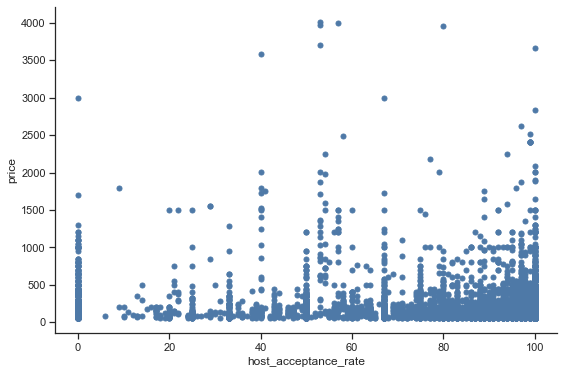

In [352]:
fig, ax = plt.subplots()
plt.scatter(numerical_train['host_acceptance_rate'], numerical_train['price'], s=25) # the s option specifies the size of the dot
ax.set_xlabel('host_acceptance_rate')
ax.set_ylabel('price')
sns.despine()
plt.show()

In [353]:
def host_acc_cond(x):
    if (x <= 100) & (x >80):
        return "80%-100%"
    elif (x <= 80) & (x >60):
        return "60%-80%"
    elif (x <= 60) & (x >40):
        return "40%-60%"
    elif (x <= 40) & (x >20):
        return "20%-40%"
    elif (x <= 20) & (x >=0):
        return "0%-20%"
    else:
        return "Unknow"

numerical_train['host_acceptance_rate']= numerical_train['host_acceptance_rate'].apply(host_acc_cond)
numerical_test['host_acceptance_rate']= numerical_test['host_acceptance_rate'].apply(host_acc_cond)

#### 1.6.10 reviews per month

For the variable `reviews_per_month`, we couldn't find information about the meaning of this variable. From airbnb website, we found related information such that airbnb provides the review rate per month. This is the rate that guests who stayed with the host left a review. However, for values in `review_per_month` it does not seem to be the right explaination. It coule possibly be the average reviews per month based on some unknown calculation methods. Nevertheless, we decided to fill in null values as 0, as it is likely that the null values represent that the listing was never reviewed.

In [354]:
numerical_train['reviews_per_month'].fillna(0,inplace = True)
numerical_test['reviews_per_month'].fillna(0,inplace = True)

In [355]:
numerical_train.isnull().sum()

host_since                                      0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
security_deposit_perc                           0
cleaning_fee_perc                               0
guests_included                                 0
extra_people_perc                               0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
review_scores_rating                            0
review_scores_accuracy                          0


### 1.7 Missing values for location
#### 1.7.1 Training set

In [356]:
# First, check the missing value of zipcode
location_train[location_train['zipcode'].isnull()].head()

host_location host_neighbourhood  \
388                 Sydney, New South Wales, Australia                NaN   
414  The house is 10 minutes from the city by publi...                NaN   
575                        Barcelona, Catalonia, Spain                NaN   
672                Redfern, New South Wales, Australia                NaN   
715                 Sydney, New South Wales, Australia                NaN   

                           street neighbourhood neighbourhood_cleansed  \
388        Sydney, NSW, Australia         Manly                  Manly   
414        Sydney, NSW, Australia      Cremorne           North Sydney   
575           NSW, NSW, Australia     Woollahra               Waverley   
672        Sydney, NSW, Australia      Waterloo                 Sydney   
715  Erskineville, NSW, Australia  Erskineville                 Sydney   

             city zipcode           smart_location  latitude  longitude  
388        Sydney     NaN        Sydney, Australia -33.80124  151.28783  
414        Sydney     NaN        Sydney, Australia -33.82657  151.22779  
575           NaN     NaN           NSW, Australia -33.89064  151.24810  
672        Sydney     NaN        Sydney, Australia -33.89586  151.20361  
715  Erskineville     NaN  Erskineville, Australia -33.90602  151.18483

In [357]:
location_train[location_train['neighbourhood'].isnull()].head()

host_location host_neighbourhood  \
0   Miranda, New South Wales, Australia                NaN   
4    Sydney, New South Wales, Australia                NaN   
9    Cromer, New South Wales, Australia                NaN   
15                                   AU                NaN   
21   Sydney, New South Wales, Australia                NaN   

                           street neighbourhood neighbourhood_cleansed  \
0         Miranda, NSW, Australia           NaN       Sutherland Shire   
4         Dee Why, NSW, Australia           NaN              Warringah   
9          Cromer, NSW, Australia           NaN              Warringah   
15  Pennant Hills, NSW, Australia           NaN                Hornsby   
21      Liverpool, NSW, Australia           NaN              Liverpool   

             city zipcode            smart_location  latitude  longitude  
0         Miranda    2228        Miranda, Australia -34.02896  151.10229  
4         Dee Why  2099.0        Dee Why, Australia -33.75705  151.29361  
9          Cromer  2099.0         Cromer, Australia -33.73767  151.27090  
15  Pennant Hills    2120  Pennant Hills, Australia -33.73808  151.07203  
21      Liverpool  2170.0      Liverpool, Australia -33.92940  150.91737

In [358]:
# fill the null value of neighbourhood first 
location_train.loc[location_train['neighbourhood'].isnull(),'neighbourhood']= location_train.loc[location_train['neighbourhood'].isnull(),'neighbourhood_cleansed']

#  Fill the null value of zipcode use the others zipcode which have the same address（neighbourhood） 
a = location_train[location_train['zipcode'].isnull()]['neighbourhood'].unique()
b = {}
for i in a :
    b[i] = location_train.loc[location_train['neighbourhood']==i, 'zipcode'].iloc[0]
    c = location_train[location_train['zipcode'].isnull()]['neighbourhood']==i
    location_train.loc[location_train['zipcode'].isnull() & c , 'zipcode'] = b[i]

# double check the null value
location_train[location_train['zipcode'].isnull()]

Empty DataFrame
Columns: [host_location, host_neighbourhood, street, neighbourhood, neighbourhood_cleansed, city, zipcode, smart_location, latitude, longitude]
Index: []

In [359]:
location_train['zipcode']

0          2228
1          2031
2          2048
3        2094.0
4        2099.0
          ...  
10630      2026
10631      2026
10632      2017
10633      2026
10634      2196
Name: zipcode, Length: 10635, dtype: object

`zipcode` still have some string value or the other types of value, because in here, the data type is object

In [360]:
# try to transform object type to float, we found there exist some strings in zipcode, the string error exist in 2216\n 2216
location_train['zipcode'][location_train['zipcode'] == '2216\n2216']= '2216'

# After we change 2216\n2216 into 2216, we run the invert function again, 
# but we found there exist some erors like NSW 2025, we need to fixed them

location_train['zipcode'][:8191] = location_train['zipcode'][:8191].str.replace('NSW','')
location_train['zipcode'][:8191] = location_train['zipcode'][:8191].str.replace('\.0','')
location_train['zipcode'] = location_train['zipcode'].apply(float)
location_train['zipcode'] = location_train['zipcode'].apply(int)

location_train['zipcode']

0        2228
1        2031
2        2048
3        2094
4        2099
         ... 
10630    2026
10631    2026
10632    2017
10633    2026
10634    2196
Name: zipcode, Length: 10635, dtype: int64

In [361]:
location_train['zipcode'].value_counts()

2026    1111
2010     616
2000     518
2095     362
2011     321
        ... 
2168       1
2143       1
2199       1
2167       1
2234       1
Name: zipcode, Length: 213, dtype: int64

In [362]:
(location_train['zipcode']>3000).sum()
# Sydney zipcode could not more than 3000

2

In [363]:
location_train[location_train['zipcode']>=3000]
# we can see that these two zipcode is wrong 

host_location host_neighbourhood  \
3757  Helensvale, Queensland, Australia                NaN   
5026                                 AU                NaN   

                                                 street neighbourhood  \
3757                         Helensvale, QLD, Australia     Blacktown   
5026  Chatswood NSW 2067, Chatswood NSW 2067, Australia     Chatswood   

     neighbourhood_cleansed                city  zipcode  \
3757              Blacktown          Helensvale     4212   
5026             Willoughby  Chatswood NSW 2067     4953   

                     smart_location  latitude  longitude  
3757          Helensvale, Australia -33.73508  150.83120  
5026  Chatswood NSW 2067, Australia -33.79325  151.19157

In [364]:
location_train.loc[location_train['neighbourhood']=="Chatswood", 'zipcode'].iloc[0]

2067

In [365]:
# filled  the zipcode with right one
location_train['zipcode'][location_train['zipcode'] == 4953] = 2067 

In [366]:
location_train.to_csv("location_train.csv")

#### 1.7.2 Test set

In [367]:
# fill the null value of neighbourhood first 
location_test.loc[location_test['neighbourhood'].isnull(),'neighbourhood']= location_test.loc[location_test['neighbourhood'].isnull(),'neighbourhood_cleansed']

#  Fill the null value of zipcode use the others zipcode which have the same address（neighbourhood） 
a = location_test[location_test['zipcode'].isnull()]['neighbourhood'].unique()
b = {}
for i in a :
    b[i] = location_test.loc[location_test['neighbourhood']==i, 'zipcode'].iloc[0]
    c = location_test[location_test['zipcode'].isnull()]['neighbourhood']==i
    location_test.loc[location_test['zipcode'].isnull() & c , 'zipcode'] = b[i]

# double check the null value
location_test[location_test['zipcode'].isnull()]

Empty DataFrame
Columns: [host_location, host_neighbourhood, street, neighbourhood, neighbourhood_cleansed, city, zipcode, smart_location, latitude, longitude]
Index: []

When we try to convert str to int, we found that ValueError: could not convert string to float: '2037 , 2000'

In [368]:
location_test[location_test['zipcode'] == '2037 , 2000']

host_location host_neighbourhood  \
id                                                             
14860  Sydney, New South Wales, Australia                NaN   

                                street neighbourhood neighbourhood_cleansed  \
id                                                                            
14860  Glebe , Sydney , NSW, Australia         Glebe                 Sydney   

                  city      zipcode              smart_location  latitude  \
id                                                                          
14860  Glebe , Sydney   2037 , 2000  Glebe , Sydney , Australia -33.87556   

       longitude  
id                
14860  151.18612

In [369]:
#Find zipcode for Glebe
location_train.loc[location_train['neighbourhood']=="Glebe", 'zipcode'].iloc[0]

2037

In [370]:
location_test['zipcode'][location_test['zipcode'] == '2037 , 2000'] ='2037'

After we fix the error of '2037 2000', we found another error ValueError: could not convert string to float: '2766\n2766'

In [371]:
location_test['zipcode'][location_test['zipcode'] == '2766\n2766']= '2276'

In [372]:
location_test['zipcode'] = location_test['zipcode'].apply(float)
location_test['zipcode'] = location_test['zipcode'].apply(int)
location_test['zipcode']

id
0        2068
1        2107
2        2042
3        2026
4        2043
         ... 
24813    2023
24814    2026
24815    2095
24816    2026
24817    2034
Name: zipcode, Length: 24818, dtype: int64

In [373]:
(location_test['zipcode']>3000).sum()
# Sydney zipcode could not more than 3000

2

In [374]:
location_test[location_test['zipcode']>=3000]
#location_test[location_test['zipcode']>=3000] we can see that these two zipcode is wrong 

host_location host_neighbourhood  \
id                                                        
10782                             US                NaN   
10926  Bundoora, Victoria, Australia                NaN   

                                                  street neighbourhood  \
id                                                                       
10782  North Sydney NSW 2060, North Sydney NSW 2060, ...  North Sydney   
10926                           Bundoora, VIC, Australia     Liverpool   

      neighbourhood_cleansed                   city  zipcode  \
id                                                             
10782           North Sydney  North Sydney NSW 2060     4971   
10926              Liverpool               Bundoora     3083   

                         smart_location  latitude  longitude  
id                                                            
10782  North Sydney NSW 2060, Australia -33.83219  151.20362  
10926               Bundoora, Australia -33.88477  150.85534

In [375]:
#Find zipcode for North Sydney and Liverpool
location_train.loc[location_train['neighbourhood']=="North Sydney", 'zipcode'].iloc[0]

2060

In [376]:
# filled  the zipcode with right one
location_test['zipcode'][location_test['zipcode'] == 4971] = 2060

After cleaning the `zipcode` we decided to use `zipcode`, `ltitude`, and `longitude` variables for describing location, thus all other values are dropped

In [377]:
location_train = location_train.drop(columns = ["host_location", "host_neighbourhood", "street", "neighbourhood", \
                                   "neighbourhood_cleansed", "city", "smart_location"])
location_test = location_test.drop(columns = ["host_location", "host_neighbourhood", "street", "neighbourhood", \
                                   "neighbourhood_cleansed", "city", "smart_location"])

In [378]:
location_train

zipcode  latitude  longitude
0         2228 -34.02896  151.10229
1         2031 -33.91539  151.23659
2         2048 -33.88847  151.16651
3         2094 -33.80042  151.27293
4         2099 -33.75705  151.29361
...        ...       ...        ...
10630     2026 -33.89369  151.26754
10631     2026 -33.89223  151.26099
10632     2017 -33.90444  151.21030
10633     2026 -33.89032  151.27437
10634     2196 -33.92841  151.08673

[10635 rows x 3 columns]

We categorized zipcode into different areas based on the following:

City & Inner West: 2000, 2006 to 2009, 2037 to 2050, 2127, 2130 to 2140, 2190 to 2200, 2203, 2204, 2214  

Eastern: 2010 to 2018 to 2036  

Endeavour: 2205 to 2210, 2216 to 2234  

Greater Western: 2115 to 2118, 2124 to 2125, 2128, 2141 to 2142, 2144 to 2148, 2150 to 2156, 2160 to 2161, 2164 to 2168, 2129 to 2141, 2143, 2162 to 2163, 2190 to 2200  

Harbourside North : 2057, 2059, 2060 to 2069, 2088 to 2091, 2110, 2111, 2015 to 2017, 2037 to 2050  

Northern Beaches: 2084 to 2087, 2092 to 2097, 2099 to 2108  

Upper North: 2070 to 2077, 2079 to 2083, 2112 to 2114, 2119 to 2122, 2126, 2154, 2158, 2159

In [379]:
def merge_map(x):
    if x == 2000:
        return "City & Inner West"
    elif 2006<=x<=2009:
        return "City & Inner West"
    elif 2037<=x<=2050:
        return "City & Inner West"
    elif x == 2127:
        return "City & Inner West"
    elif 2130<=x<=2140:
        return "City & Inner West"
    elif 2190<=x<=2200:
        return "City & Inner West"
    elif x == 2203:
        return "City & Inner West"
    elif x==2204:
        return "City & Inner West"
    elif x==2214:
        return "City & Inner West"
    elif 2010<=x<=2018:
        return "Eastern"
    elif 2018<=x<=2036:
        return "Eastern"
    elif 2205<=x<=2210:
        return "Endeavour"
    elif 2216<=x<=2234:
        return "Endeavour"
    elif 2115<=x<=2118:
        return "Greater Western"
    elif 2124<=x<=2125:
        return "Greater Western"
    elif x==2128:
        return "Greater Western"
    elif 2141<=x<=2142:
        return "Greater Western"
    elif 2144<=x<=2148:
        return "Greater Western"
    elif 2150<=x<=2156:
        return "Greater Western"
    elif 2160<=x<=2161:
        return "Greater Western"
    elif 2164<=x<=2168:
        return "Greater Western"
    elif 2129<=x<=2141:
        return "Greater Western"
    elif x==2143:
        return "Greater Western"
    elif 2162<=x<=2163:
        return "Greater Western"
    elif 2057<=x<=2069:
        return "Harbourside North"
    elif 2088<=x<=2091:
        return "Harbourside North"
    elif 2110<=x<=2111:
        return "Harbourside North"
    elif 2037<=x<=2050:
        return "Harbourside North"
    elif 2084<=x<=2087:
        return "Northern Beaches"
    elif 2092<=x<=2108:
        return "Northern Beaches"
    elif 2070<=x<=2083:
        return "Upper North"
    elif 2070<=x<=2083:
        return "Upper North"
    elif 2112<=x<=2114:
        return "Upper North"
    elif 2070<=x<=2083:
        return "Upper North"
    elif 2119<=x<=2122:
        return "Upper North"
    elif x==2126:
        return "Upper North"
    elif x==2154:
        return "Upper North"
    elif x==2158:
        return "Upper North"
    elif x==2159:
        return "Upper North"
    elif x>=3000:
        return "Unknown"
    else:
        return "Other"

    
location_train['zipcode']= location_train['zipcode'].apply(merge_map)
location_test['zipcode']= location_test['zipcode'].apply(merge_map)

In [380]:
(location_train['zipcode']=='Unknown').sum()

1

In [381]:
location_train

zipcode  latitude  longitude
0              Endeavour -34.02896  151.10229
1                Eastern -33.91539  151.23659
2      City & Inner West -33.88847  151.16651
3       Northern Beaches -33.80042  151.27293
4       Northern Beaches -33.75705  151.29361
...                  ...       ...        ...
10630            Eastern -33.89369  151.26754
10631            Eastern -33.89223  151.26099
10632            Eastern -33.90444  151.21030
10633            Eastern -33.89032  151.27437
10634  City & Inner West -33.92841  151.08673

[10635 rows x 3 columns]

## 2.0 Feature Engineering and EDA
### 2.1 Response variable

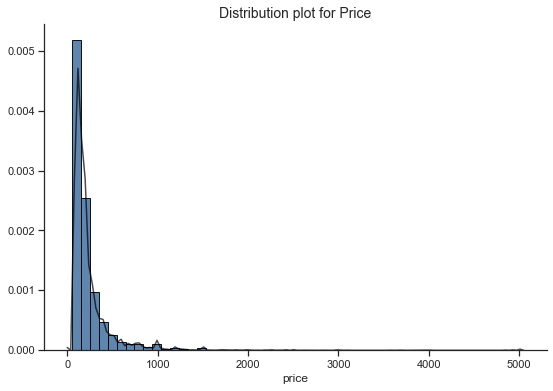

In [382]:
from statlearning import plot_dist
fig, ax = plot_dist(numerical_train["price"])
ax.set_title('Distribution plot for Price', fontsize=14)
plt.show()

In [383]:
numerical_train["response"] = np.log(numerical_train["price"])
numerical_train_eda = numerical_train
numerical_train = numerical_train.drop(columns = "price")

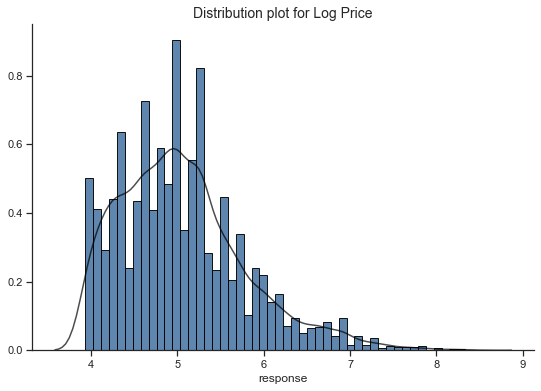

In [384]:
fig, ax = plot_dist(numerical_train["response"])
ax.set_title('Distribution plot for Log Price', fontsize=14)
plt.show()

### 2.2 Numerical variables
#### 2.2.1 Correlation

In [385]:
respone_corr = numerical_train.corr()["response"].sort_values(ascending = False)
respone_corr[(respone_corr>=0.1)|(respone_corr<-0.1)]

response                                        1.000000
accommodates                                    0.695292
bedrooms                                        0.683614
beds                                            0.618452
bathrooms                                       0.505982
guests_included                                 0.297106
host_listings_count                             0.187345
availability_365                                0.124528
extra_people_perc                              -0.184866
calculated_host_listings_count_private_rooms   -0.217964
Name: response, dtype: float64

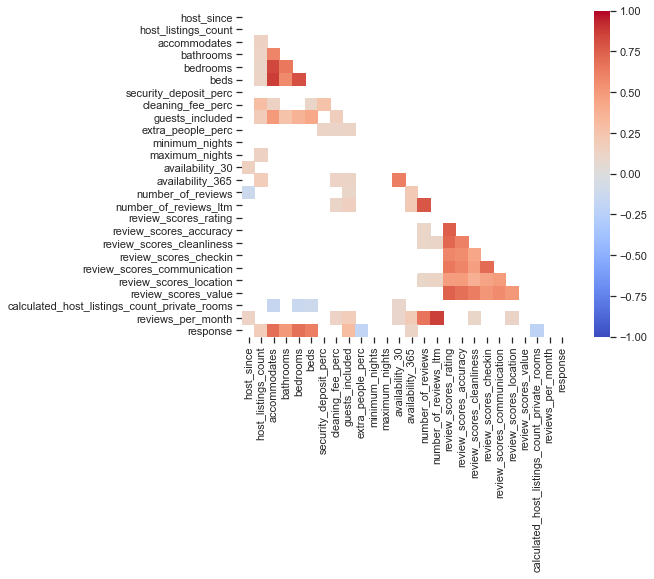

In [386]:
corr = numerical_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr[(corr>=0.1)|(corr<-0.1)], cmap="coolwarm", mask = mask, vmax = 1, vmin = -1, square = True )
plt.show()

#### 2.2.2 Test significant

In [387]:
import statsmodels.api as sm

X = numerical_train[['accommodates','bedrooms','beds','bathrooms',"guests_included", "host_listings_count", "availability_365",\
                     "extra_people_perc", "calculated_host_listings_count_private_rooms"]]

X = sm.add_constant(X)
y = numerical_train['response']

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1505.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:14:43   Log-Likelihood:                -7411.9
No. Observations:               10635   AIC:                         1.484e+04
Df Residuals:                   10625   BIC:                         1.492e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

#### 2.2.3 Distribution

In [388]:
continuous = list(numerical_train.loc[:,numerical_train.dtypes != "object"].columns)

In [389]:
from statlearning import plot_dists
plot_dists(numerical_train[continuous])
plt.show()

#### 2.2.4 Relationship with response variable

In [390]:
from statlearning import plot_regressions

plot_regressions(numerical_train[continuous], numerical_train["response"])
plt.show()

#### 2.2.5 Check outliers

From graph above we found that variables `maximum_nights`, `bathrooms`, `bedrooms`, and `beds` may contain some outliers. Thus we look further into these variabels.
##### 2.2.5.1  maximum_nights

In [391]:
numerical_train['maximum_nights'].sort_values(ascending = False).head(20)

7818     10000
671       9999
7876      3000
10634     1125
4500      1125
4510      1125
4506      1125
4505      1125
4502      1125
4497      1125
4499      1125
4513      1125
4496      1125
4493      1125
4492      1125
4491      1125
4512      1125
4515      1125
4514      1125
4488      1125
Name: maximum_nights, dtype: int64

For listing 7818 and 671 the values is extreme.

In [392]:
#look at the two listing
numerical_train.loc[(7818,671),:]

host_since host_response_rate host_acceptance_rate  host_listings_count  \
7818        2012           80%-100%             80%-100%                  3.0   
671         2012           80%-100%             80%-100%                  1.0   

      accommodates  bathrooms  bedrooms  beds  security_deposit_perc  \
7818             4        1.0       1.0   1.0                  222.0   
671              7        3.0       3.0   4.0                  122.0   

      cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  \
7818               64.0                2               37.0               1   
671                33.0                6                8.0               3   

      maximum_nights  availability_30  availability_365  number_of_reviews  \
7818           10000                5               176                547   
671             9999               18               233                 76   

      number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
7818                     89                  98.0                    10.0   
671                      21                  97.0                    10.0   

      review_scores_cleanliness  review_scores_checkin  \
7818                       10.0                   10.0   
671                        10.0                   10.0   

      review_scores_communication  review_scores_location  \
7818                         10.0                    10.0   
671                          10.0                    10.0   

      review_scores_value  calculated_host_listings_count_private_rooms  \
7818                 10.0                                             0   
671                  10.0                                             0   

      reviews_per_month  response  
7818               5.72  4.905275  
671                2.16  5.505332

We think that these two values are errors as 10000/365 is around 27 years which does not make sense, thus we will drop these values later when merged with other variables

##### 2.2.5.1  beds & bedrooms & bathrooms

In [393]:
numerical_train['beds'].value_counts().sort_index()

0.0      199
1.0     5001
2.0     2513
3.0     1323
4.0      792
5.0      424
6.0      199
7.0       82
8.0       54
9.0       15
10.0      11
11.0      12
12.0       4
13.0       1
16.0       3
17.0       1
26.0       1
Name: beds, dtype: int64

In [394]:
numerical_train[numerical_train["beds"]==26]

host_since host_response_rate host_acceptance_rate  host_listings_count  \
2846        2016           80%-100%             80%-100%                  1.0   

      accommodates  bathrooms  bedrooms  beds  security_deposit_perc  \
2846            16        7.0      12.0  26.0                   96.0   

      cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  \
2846               55.0                1                0.0               3   

      maximum_nights  availability_30  availability_365  number_of_reviews  \
2846              14               15               313                  6   

      number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2846                      1                 100.0                    10.0   

      review_scores_cleanliness  review_scores_checkin  \
2846                       10.0                   10.0   

      review_scores_communication  review_scores_location  \
2846                         10.0                    10.0   

      review_scores_value  calculated_host_listings_count_private_rooms  \
2846                 10.0                                             0   

      reviews_per_month  response  
2846               0.22  7.646831

After inspecting the data, although listing 2846 may have extreme values, the description suggests that 26 beds is not an error.

In [395]:
numerical_train['bedrooms'].value_counts().sort_index()

0.0      641
1.0     5479
2.0     2690
3.0     1004
4.0      582
5.0      196
6.0       32
7.0        7
9.0        1
10.0       1
12.0       1
16.0       1
Name: bedrooms, dtype: int64

In [396]:
numerical_train[numerical_train["bedrooms"]==16]

host_since host_response_rate host_acceptance_rate  host_listings_count  \
735        2014               None               Unknow                  1.0   

     accommodates  bathrooms  bedrooms  beds  security_deposit_perc  \
735             9        3.5      16.0   9.0                  357.0   

     cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  \
735               43.0                1                0.0              14   

     maximum_nights  availability_30  availability_365  number_of_reviews  \
735              21               30               365                  1   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
735                      0                 100.0                    10.0   

     review_scores_cleanliness  review_scores_checkin  \
735                       10.0                   10.0   

     review_scores_communication  review_scores_location  review_scores_value  \
735                         10.0                     8.0                  8.0   

     calculated_host_listings_count_private_rooms  reviews_per_month  response  
735                                             0               0.02   6.55108

After inspecting the data including desciption of the listing, no signs of error were found, thus we did not drop the outlier.

In [397]:
numerical_train['bathrooms'].value_counts().sort_index()

0.0       21
0.5       22
1.0     7182
1.5      661
2.0     1815
2.5      368
3.0      341
3.5       87
4.0       81
4.5       23
5.0       15
5.5        3
6.0        7
6.5        3
7.0        3
11.0       1
18.0       2
Name: bathrooms, dtype: int64

In [398]:
numerical_train[numerical_train["bathrooms"]==18]

host_since host_response_rate host_acceptance_rate  host_listings_count  \
2193        2018           80%-100%             80%-100%                 12.0   
4687        2018           80%-100%             80%-100%                 12.0   

      accommodates  bathrooms  bedrooms  beds  security_deposit_perc  \
2193             1       18.0       1.0   1.0                    0.0   
4687             2       18.0       1.0   1.0                    0.0   

      cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  \
2193               29.0                1                0.0               7   
4687               27.0                1                0.0               7   

      maximum_nights  availability_30  availability_365  number_of_reviews  \
2193            1125                7               288                  3   
4687            1125               26               361                  8   

      number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
2193                      3                  87.0                     9.0   
4687                      7                  83.0                     8.0   

      review_scores_cleanliness  review_scores_checkin  \
2193                        9.0                   10.0   
4687                        7.0                    9.0   

      review_scores_communication  review_scores_location  \
2193                         10.0                     9.0   
4687                          9.0                     8.0   

      review_scores_value  calculated_host_listings_count_private_rooms  \
2193                 10.0                                             2   
4687                  9.0                                             2   

      reviews_per_month  response  
2193               0.76  3.931826  
4687               0.60  4.007333

After inspecting the desciptions about listing 2193, we believe that it is some sort of hotel that has many seperate rooms, the number of bathroom should be wrongly counted, thus we would drop this listing. Same issue found for listing 4587.

In [399]:
numerical_train_eda = numerical_train_eda.drop([7818, 671, 2193, 4687])
numerical_train_eda.shape

(10631, 29)

In [400]:
beds_eda = numerical_train_eda.groupby("beds").mean()['response'].round(2)
plt.bar(beds_eda.index,beds_eda,color='paleturquoise',edgecolor='k')
plt.plot(beds_eda.index,beds_eda,'o-', color = 'g')
plt.xlabel('beds number')
plt.ylabel('Average price')
plt.title('Distribution of average price in different number of beds ')
plt.savefig('1')

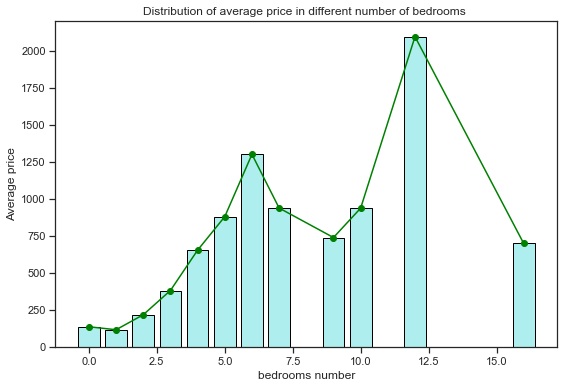

In [401]:
bedrooms_eda = numerical_train_eda.groupby("bedrooms").mean()['price'].round(2)
plt.bar(bedrooms_eda.index,bedrooms_eda,color='paleturquoise',edgecolor='k')
plt.plot(bedrooms_eda.index,bedrooms_eda,'o-', color = 'g')
plt.xlabel('bedrooms number')
plt.ylabel('Average price')
plt.title('Distribution of average price in different number of bedrooms ')
plt.savefig('1')

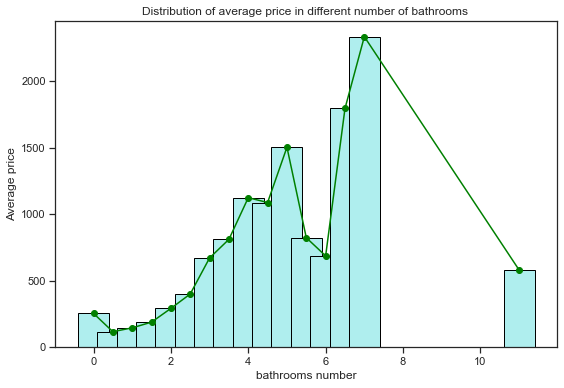

In [402]:
bathrooms_eda = numerical_train_eda.groupby("bathrooms").mean()['price'].round(2)
plt.bar(bathrooms_eda.index,bathrooms_eda,color='paleturquoise',edgecolor='k')
plt.plot(bathrooms_eda.index,bathrooms_eda,'o-', color = 'g')
plt.xlabel('bathrooms number')
plt.ylabel('Average price')
plt.title('Distribution of average price in different number of bathrooms ')
plt.savefig('1')

### 2.3 Categorical variables

In [403]:
price = numerical_train_eda['price']  
categorical_train_eda = pd.concat([categorical_train,price],axis = 1)   

In [404]:
categorical_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24818 entries, 0 to 24817
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_response_time      24818 non-null  object
 1   host_is_superhost       24818 non-null  object
 2   host_verifications      24818 non-null  object
 3   host_identity_verified  24818 non-null  object
 4   is_location_exact       24818 non-null  object
 5   property_type           24818 non-null  object
 6   room_type               24818 non-null  object
 7   amenities               24818 non-null  object
 8   instant_bookable        24818 non-null  object
 9   cancellation_policy     24818 non-null  object
 10  last_review_            24818 non-null  object
dtypes: object(11)
memory usage: 2.9+ MB


#### 2.2.1 host_response_time

In [405]:
pd.crosstab(index=categorical_test['host_response_time'],columns="T_F")

col_0                 T_F
host_response_time       
Not Mention         10424
a few days or more    405
within a day         1507
within a few hours   1954
within an hour      10528

In [406]:
categorical_train_eda.groupby('host_response_time')['price'].describe().round(2)

count    mean     std   min    25%    50%    75%     max
host_response_time                                                           
Not Mention         4472.0  202.41  222.87  51.0   80.0  131.0  231.0  5000.0
a few days or more   185.0  261.38  362.63  51.0   74.0  121.0  275.0  2999.0
within a day         674.0  267.17  371.06  51.0   85.0  144.0  250.0  4000.0
within a few hours   836.0  264.19  391.84  51.0   89.0  149.0  249.0  3580.0
within an hour      4464.0  215.76  259.27  51.0  100.0  150.0  220.0  4013.0

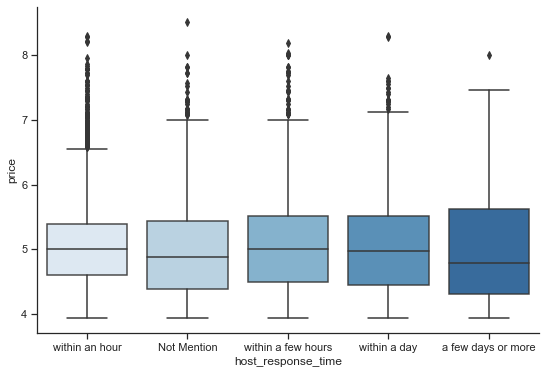

In [407]:
sns.boxplot(x = categorical_train_eda["host_response_time"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.2 hot_is_superhost

In [408]:
pd.crosstab(index=categorical_train_eda['host_is_superhost'],columns="number")

col_0              number
host_is_superhost        
f                    9021
t                    1614

In [409]:
categorical_train_eda.groupby('host_is_superhost')['price'].describe().round(2)

count    mean     std   min    25%    50%    75%     max
host_is_superhost                                                           
f                  9019.0  218.56  270.65  51.0   89.0  144.0  231.5  5000.0
t                  1612.0  214.93  263.00  51.0  100.0  150.0  223.0  4000.0

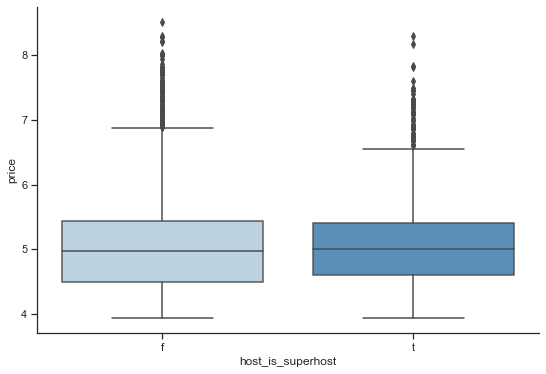

In [410]:
sns.boxplot(x = categorical_train_eda["host_is_superhost"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.3 host_verifications

In [411]:
categorical_train_eda['host_verifications']

0        ['email', 'phone', 'jumio', 'offline_governmen...
1                                       ['email', 'phone']
2        ['email', 'phone', 'reviews', 'jumio', 'offlin...
3                            ['email', 'phone', 'reviews']
4                ['email', 'phone', 'facebook', 'reviews']
                               ...                        
10630    ['email', 'phone', 'facebook', 'reviews', 'jum...
10631    ['email', 'phone', 'reviews', 'jumio', 'govern...
10632    ['email', 'phone', 'facebook', 'reviews', 'jum...
10633    ['phone', 'jumio', 'offline_government_id', 's...
10634    ['email', 'phone', 'facebook', 'reviews', 'jum...
Name: host_verifications, Length: 10635, dtype: object

In [412]:
categorical_train['host_verifications']= categorical_train['host_verifications'].apply(lambda x: len(x.split(",")))
categorical_test['host_verifications']= categorical_test['host_verifications'].apply(lambda x: len(x.split(",")))
categorical_train_eda['host_verifications']= categorical_train_eda['host_verifications'].apply(lambda x: len(x.split(",")))

In [413]:
categorical_train_eda.corr()['price'].sort_values().round(4)

host_verifications    0.0112
price                 1.0000
Name: price, dtype: float64

In [414]:
verifications = categorical_train_eda.groupby("host_verifications").mean()['price'].round(2)
print(verifications)

host_verifications
1     212.82
2     210.35
3     200.30
4     203.62
5     236.27
6     224.14
7     214.44
8     213.80
9     225.02
10    213.60
11    171.00
Name: price, dtype: float64


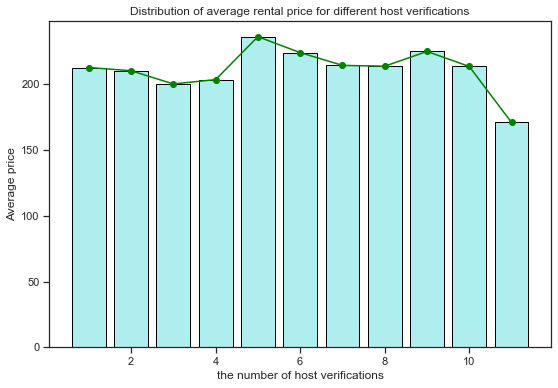

In [415]:
plt.bar(verifications.index,verifications,color='paleturquoise',edgecolor='k')
plt.plot(verifications.index,verifications,'o-', color = 'g')
plt.xlabel('the number of host verifications')
plt.ylabel('Average price')
plt.title('Distribution of average rental price for different host verifications')
plt.savefig('Distribution of average rental price')

According to the above data and graph, we find that the correlation between `host_verifications` and `price` is about 0.0113 and the average price do not shows any obvious trend. So we think `host_verifications` does not affect the rental price

#### 2.2.4 host_identity_verified

In [416]:
pd.crosstab(index=categorical_train_eda['host_identity_verified'],columns="number")

col_0                   number
host_identity_verified        
f                         6780
t                         3855

In [417]:
categorical_train_eda.groupby('host_identity_verified')['price'].describe().round(2)

count    mean     std   min   25%    50%    75%  \
host_identity_verified                                                     
f                       6776.0  216.86  270.03  51.0  89.0  140.0  226.5   
t                       3855.0  220.02  268.58  51.0  95.0  150.0  240.0   

                           max  
host_identity_verified          
f                       3953.0  
t                       5000.0

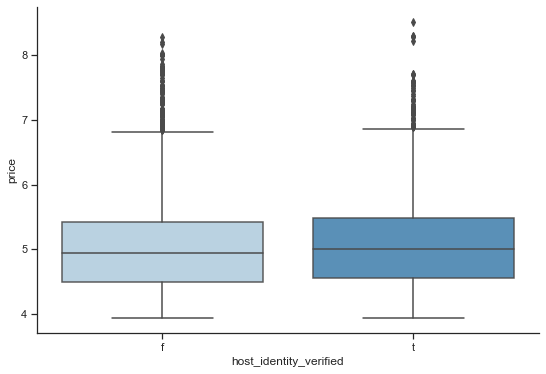

In [418]:
sns.boxplot(x = categorical_train_eda["host_identity_verified"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.5 is_location_exact 

In [419]:
pd.crosstab(index=categorical_train_eda['is_location_exact'],columns="number")

col_0              number
is_location_exact        
f                    2602
t                    8033

In [420]:
categorical_train_eda.groupby('is_location_exact')['price'].describe().round(2)

count    mean     std   min   25%    50%    75%     max
is_location_exact                                                          
f                  2602.0  220.13  319.42  51.0  85.0  140.0  220.0  5000.0
t                  8029.0  217.32  251.21  51.0  92.0  147.0  235.0  4013.0

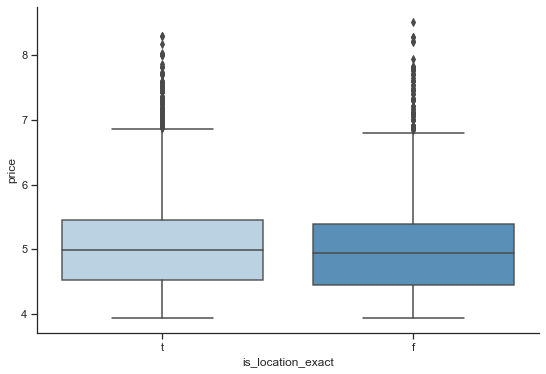

In [421]:
sns.boxplot(x = categorical_train_eda["is_location_exact"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.6 property_type 

In [422]:
pd.crosstab(index=categorical_train_eda['property_type'],columns="number")

col_0                   number
property_type                 
Aparthotel                   4
Apartment                 6439
Bed and breakfast           19
Boat                        11
Boutique hotel              48
Bungalow                    51
Cabin                       19
Camper/RV                    4
Castle                       1
Condominium                208
Cottage                     42
Earth house                  2
Farm stay                    3
Guest suite                216
Guesthouse                 155
Heritage hotel (India)       1
Hostel                      21
Hotel                       14
House                     2692
Island                       2
Loft                        58
Other                       14
Serviced apartment          63
Tiny house                  20
Townhouse                  451
Train                        1
Villa                       75
Yurt                         1

We found that the variable `property_types` has the problem of sparse label, thus we merge all clases with little count into other category

In [423]:
categorical_train['property_type'] = np.where(categorical_train['property_type'].str.contains('House'),"House",
                                             (np.where(categorical_train['property_type'].str.contains('Apartment'),"Apartment",
                                                      (np.where(categorical_train['property_type'].str.contains('Townhouse'),"Townhouse",
                                                                "Other")))))

In [424]:
categorical_test['property_type'] = np.where(categorical_test['property_type'].str.contains('House'),"House",
                                             (np.where(categorical_test['property_type'].str.contains('Apartment'),"Apartment",
                                                      (np.where(categorical_test['property_type'].str.contains('Townhouse'),"Townhouse",
                                                                "Other")))))

In [425]:
categorical_train_eda['property_type'] = np.where(categorical_train_eda['property_type'].str.contains('House'),"House",
                                             (np.where(categorical_train_eda['property_type'].str.contains('Apartment'),"Apartment",
                                                      (np.where(categorical_train_eda['property_type'].str.contains('Townhouse'),"Townhouse",
                                                                "Other")))))

In [426]:
pd.crosstab(index=categorical_test['property_type'],columns="number")

col_0          number
property_type        
Apartment       15180
House            6219
Other            2402
Townhouse        1017

In [427]:
categorical_train_eda.groupby('property_type')['price'].describe().round(2)

count    mean     std   min   25%    50%    75%     max
property_type                                                          
Apartment      6438.0  170.66  148.41  51.0  95.0  140.0  199.0  3669.0
House          2691.0  340.77  400.29  51.0  85.0  199.0  450.0  5000.0
Other          1051.0  207.74  355.60  51.0  89.0  125.0  180.0  4013.0
Townhouse       451.0  185.32  155.45  51.0  74.0  140.0  250.0  1549.0

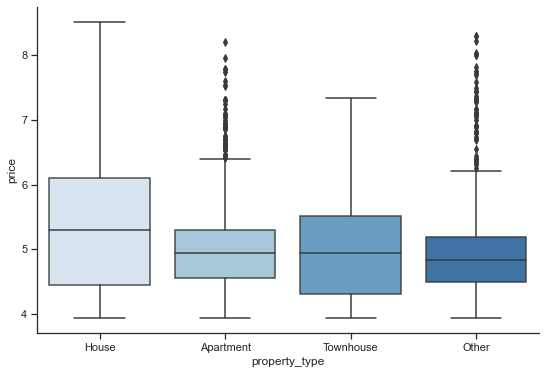

In [428]:
sns.boxplot(x = categorical_train_eda["property_type"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.7 room_type

In [429]:
pd.crosstab(index=categorical_train_eda['room_type'],columns="number")

col_0            number
room_type              
Entire home/apt    7334
Hotel room           65
Private room       3171
Shared room          65

In [430]:
categorical_train_eda.groupby('room_type')['price'].describe().round(2)

count    mean     std   min    25%    50%    75%     max
room_type                                                                 
Entire home/apt  7332.0  272.84  305.10  51.0  129.0  180.0  290.0  5000.0
Hotel room         63.0  181.79  129.99  51.0  129.0  170.0  199.0   999.0
Private room     3171.0   94.20   72.40  51.0   60.0   77.0  100.0  1500.0
Shared room        65.0  107.58   80.67  51.0   60.0   74.0  106.0   390.0

In [431]:
categorical_train.loc[categorical_train['room_type'] == "Hotel room",'room_type']='other'
categorical_test.loc[categorical_test['room_type'] == "Hotel room",'room_type']='other'

In [432]:
categorical_train.loc[categorical_train['room_type'] == "Shared room",'room_type']='other'
categorical_test.loc[categorical_test['room_type'] == "Shared room",'room_type']='other'

In [433]:
categorical_train_eda.loc[categorical_train_eda['room_type'] == "Shared room",'room_type']='other'
categorical_train_eda.loc[categorical_train_eda['room_type'] == "Hotel room",'room_type']='other'

In [434]:
categorical_train_eda.groupby('room_type')['price'].describe().round(2)

count    mean     std   min    25%    50%    75%     max
room_type                                                                 
Entire home/apt  7332.0  272.84  305.10  51.0  129.0  180.0  290.0  5000.0
Private room     3171.0   94.20   72.40  51.0   60.0   77.0  100.0  1500.0
other             128.0  144.11  113.65  51.0   65.0  120.0  199.0   999.0

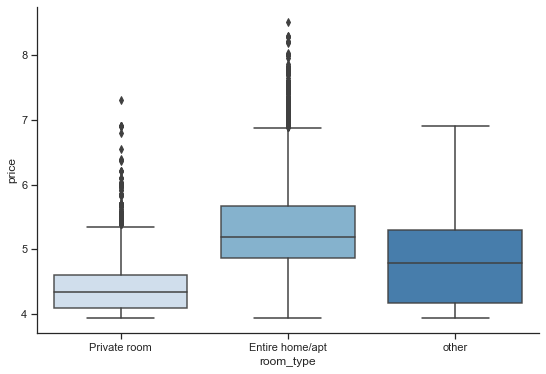

In [435]:
sns.boxplot(x = categorical_train_eda["room_type"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.8 amenities

In [436]:
categorical_train_eda['amenities']

0        {TV,Kitchen,"Free parking on premises",Breakfa...
1        {Kitchen,Heating,Washer,Dryer,"Smoke detector"...
2        {TV,Wifi,"Air conditioning",Kitchen,Breakfast,...
3        {TV,Internet,Wifi,Kitchen,"Free parking on pre...
4        {TV,Wifi,Kitchen,Breakfast,Heating,"Family/kid...
                               ...                        
10630    {TV,Wifi,Kitchen,"Suitable for events",Washer,...
10631    {TV,Wifi,Pool,Kitchen,Elevator,"Buzzer/wireles...
10632    {TV,Wifi,Kitchen,Washer,Dryer,"Smoke detector"...
10633    {TV,Wifi,Kitchen,Heating,Washer,Dryer,"Smoke d...
10634    {TV,Wifi,Kitchen,"Free parking on premises",He...
Name: amenities, Length: 10635, dtype: object

In [437]:
categorical_train['amenities']= categorical_train['amenities'].apply(lambda x: len(x.split(",")))
categorical_test['amenities']= categorical_test['amenities'].apply(lambda x: len(x.split(",")))
categorical_train_eda['amenities']= categorical_train_eda['amenities'].apply(lambda x: len(x.split(",")))

In [438]:
categorical_train_eda.corr()['price'].sort_values().round(4)

host_verifications    0.0112
amenities             0.1247
price                 1.0000
Name: price, dtype: float64

We find that the correlation between  and price is about 0.1246. The graph shows that the relationship between `amenities` and `price` seems to be positive.

In [439]:
amenities = categorical_train_eda.groupby("amenities").mean()['price'].round(2)

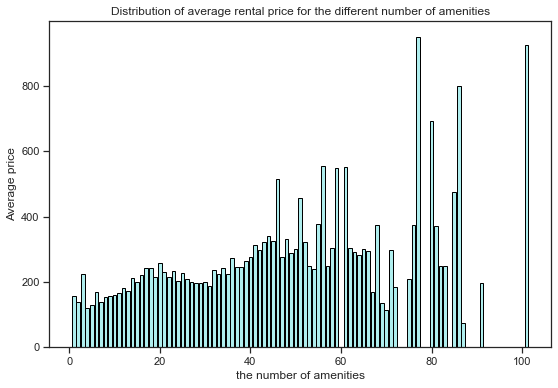

In [440]:
plt.bar(amenities.index,amenities,color='paleturquoise',edgecolor='k')
plt.xlabel('the number of amenities')
plt.ylabel('Average price')
plt.title('Distribution of average rental price for the different number of amenities')
plt.savefig('Distribution of average rental price2')

#### 2.2.9 last_review

In [441]:
pd.crosstab(index=categorical_train_eda['last_review_'],columns="number")

col_0         number
last_review_        
2019-2020       5826
Before 2019     2216
Unknown         2593

In [442]:
categorical_train_eda.groupby('last_review_')['price'].describe().round(2)

count    mean     std   min   25%    50%    75%     max
last_review_                                                          
2019-2020     5822.0  204.43  218.33  51.0  98.0  147.0  220.0  3953.0
Before 2019   2216.0  197.26  230.94  51.0  85.0  135.0  217.5  5000.0
Unknown       2593.0  266.22  376.98  51.0  85.0  150.0  280.0  4013.0

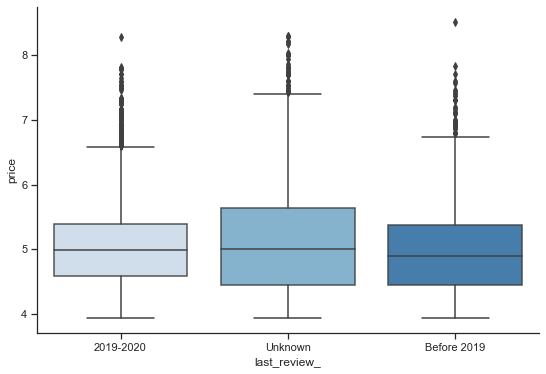

In [443]:
sns.boxplot(x = categorical_train_eda["last_review_"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.10 instant_bookable 

In [444]:
pd.crosstab(index=categorical_train_eda['instant_bookable'],columns="number")

col_0             number
instant_bookable        
f                   5835
t                   4800

In [445]:
categorical_train_eda.groupby('instant_bookable')['price'].describe().round(2)

count    mean     std   min   25%    50%    75%     max
instant_bookable                                                          
f                 5834.0  234.77  297.32  51.0  89.5  150.0  250.0  5000.0
t                 4797.0  197.62  229.57  51.0  89.0  140.0  210.0  3953.0

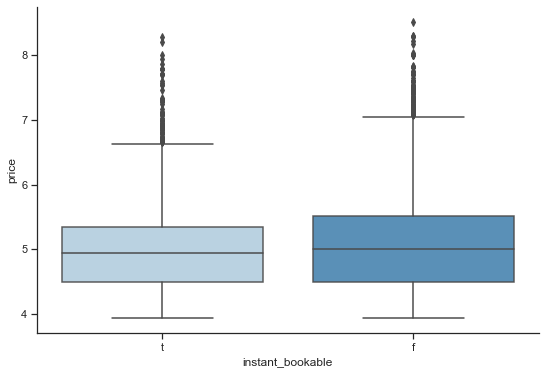

In [446]:
sns.boxplot(x = categorical_train_eda["instant_bookable"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.2.11 cancellation_policy

In [447]:
pd.crosstab(index=categorical_train_eda['cancellation_policy'],columns="number")

col_0                        number
cancellation_policy                
flexible                       3213
luxury_moderate                   1
luxury_super_strict_125           2
moderate                       2667
strict_14_with_grace_period    4657
super_strict_30                  29
super_strict_60                  66

Same problem of sparse label with `cancellation policy`, thus we categorized it into three categories, strict, flexible, and moderate

In [448]:
categorical_train['cancellation_policy'] = np.where(categorical_train['cancellation_policy'].str.contains('flexible'), "flexible", \
                                            (np.where(categorical_train['cancellation_policy'].str.contains('moderate'),"moderate",
                                                       "Strict")))

In [449]:
categorical_test['cancellation_policy'] = np.where(categorical_test['cancellation_policy'].str.contains('flexible'),"flexible",\
                                        (np.where(categorical_test['cancellation_policy'].str.contains('moderate'),"moderate",
                                                       "Strict")))

In [450]:
categorical_train_eda['cancellation_policy'] = np.where(categorical_train_eda['cancellation_policy'].str.contains('flexible'),"flexible",\
                                             (np.where(categorical_train_eda['cancellation_policy'].str.contains('moderate'),"moderate",
                                                       "Strict")))

In [451]:
pd.crosstab(index=categorical_test['cancellation_policy'],columns="number")

col_0                number
cancellation_policy        
Strict                11093
flexible               7645
moderate               6080

In [452]:
categorical_train_eda.groupby('cancellation_policy')['price'].describe().round(2)

count    mean     std   min    25%    50%    75%     max
cancellation_policy                                                           
Strict               4752.0  269.53  326.10  51.0  115.0  170.0  290.0  4013.0
flexible             3213.0  176.40  216.63  51.0   74.0  115.0  199.0  5000.0
moderate             2666.0  176.32  187.07  51.0   86.0  129.0  199.0  2414.0

We found that Airbnb rentals which have strict cancellation policy may have more revenue.

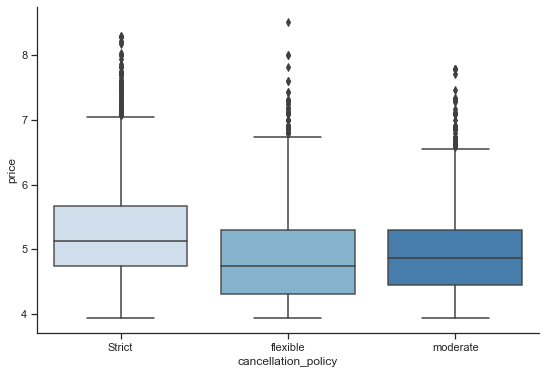

In [453]:
sns.boxplot(x = categorical_train_eda["cancellation_policy"], y = np.log(categorical_train_eda["price"]), \
            boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

### 2.3 Location

In [454]:
latitude = location_train['latitude'][:1000]
longitude = location_train['longitude'][:1000]

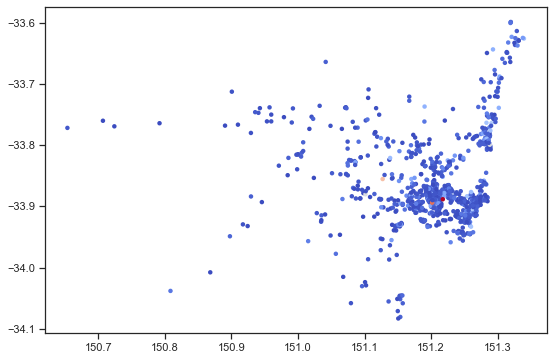

In [455]:
f = plt.figure()
cmap = sns.diverging_palette(220,10,as_cmap = True)
plt.scatter(longitude, latitude, s = 20,
           c = numerical_train_eda['price'][:1000], edgecolors = 'none',
           cmap = plt.get_cmap('coolwarm'), alpha = 1)

In [456]:
pip install mplleaflet

Note: you may need to restart the kernel to use updated packages.


In [457]:
import mplleaflet
mplleaflet.display(fig = f)

### 2.4 Text variables
We used wordcloud to inspect what kind of descriptions that are generally linked with high price and what kind of desciptions are linked with low price. 

#### 2.4.1 Space

In [458]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [459]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [460]:
text_train_2 = pd.concat([text_train, numerical_train_eda["price"]], axis = 1, ignore_index=False)

In [461]:
numerical_train_eda["price"].describe()

count    10631.000000
mean       218.005738
std        269.493517
min         51.000000
25%         89.000000
50%        144.000000
75%        231.000000
max       5000.000000
Name: price, dtype: float64

In [462]:
numerical_train_eda["price"].quantile(0.9)

400.0

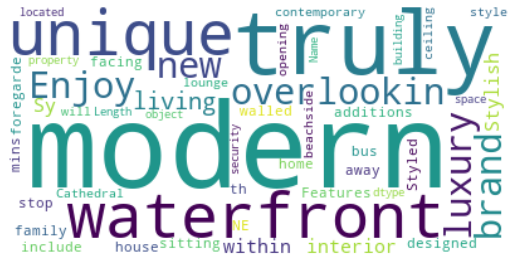

In [463]:
# top 3000 high price is 250 per night
High_price_space = text_train_2[text_train_2["price"] >= 250]["space"]

stopwords = set(STOPWORDS)
stopwords.update(["apartment", "None", "city", "Period"])  # manually add more stopwords

wordcloud = WordCloud( background_color = "white", stopwords = stopwords, max_words=10000).generate(str(High_price_space))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

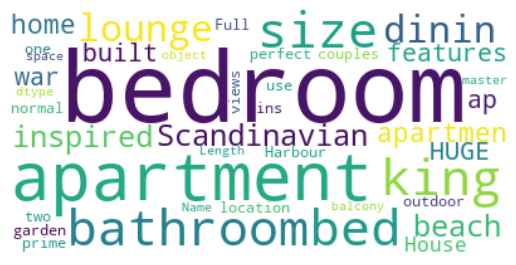

In [464]:
Middle_price_space = text_train_2[(text_train_2["price"] >= 100) & (text_train_2["price"] <= 250)]["space"]

stopwords = set(STOPWORDS)
stopwords.update(["None"])  # manually add more stopwords

wordcloud = WordCloud( background_color = "white", stopwords = stopwords, max_words=10000).generate(str(Middle_price_space))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

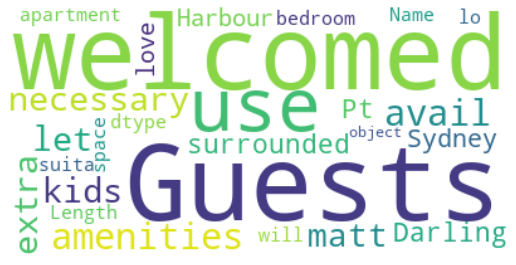

In [465]:
Low_price_space = text_train_2[text_train_2["price"] <= 100]["space"]

stopwords = set(STOPWORDS)
stopwords.update(["None"])

wordcloud = WordCloud( background_color = "white", stopwords = stopwords, max_words=10000).generate(str(Low_price_space))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

After creating word cloud for different price bins, we obtained words that are linked with high price and low price. We decided to use regular expression on `space` to extract whether information within it is positive or negative descrptions. 

In [466]:
import re
HighPrice_sentiment = []                           #creating a list
space_score = pd.DataFrame()                          #creating a dataframe
for i in text_train["space"].astype(str):             #for every row in the column stu_tags
    find = re.findall(r"(modern|truly|Enjoy|unique|over|lookin|waterfront|interior|\
                        within|luxury|Stylish|living|new|designed|brand|dinin|\
                        Styled|beachside|lounge|property|Cathedral|master|perfect|\
                        Features|Huge|views|garden|views|prime|balcony|security|house)", i)  
                                                 #find whether the words exists 
    find_count = len(find)                       #count the number words in the list
    HighPrice_sentiment.append(int(find_count))   #append to the list
space_score["HighPrice_sentiment"] = HighPrice_sentiment    #put into dataframe

In [467]:
LowPrice_sentiment = []                           #creating a list                         
for i in text_train["space"].astype(str):             #for every row in the column stu_tags
    find = re.findall(r"(use|lo|Pt|kids|amenities|avail|extra|love|\
                        surrounded|necessary|matt|suita|let|welcomed|extra)", i)  
                                                 #find whether the words exists 
    find_count = len(find)                       #count the number words in the list
    LowPrice_sentiment.append(int(find_count))   #append to the list
space_score["LowPrice_sentiment"] = LowPrice_sentiment    #put into dataframe

In [468]:
space_score["Space_Sentiment"] = space_score["HighPrice_sentiment"] - space_score["LowPrice_sentiment"]

In [469]:
space_score["Space_Sentiment"]

0       -4
1        0
2        1
3        1
4       -5
        ..
10630   -2
10631    0
10632   -1
10633   -2
10634    0
Name: Space_Sentiment, Length: 10635, dtype: int64

In [470]:
space_score.loc[space_score["Space_Sentiment"] > 0, "Space_Sentiment"] = 1     #positive sentiment
space_score.loc[space_score["Space_Sentiment"] < 0, "Space_Sentiment"] = 0     #negative sentiment

In [471]:
space_score = space_score.drop(columns = ["HighPrice_sentiment", "LowPrice_sentiment"])

In [472]:
space_score["Space_Sentiment"] = space_score["Space_Sentiment"].replace([1,0],["High", "Low"])

In [473]:
text_train = pd.concat([text_train, space_score], axis = 1, ignore_index=False)
text_train = text_train.drop(columns = "space")

In [474]:
text_train.head()

description  neighborhood_overview  \
0  New house built in (Phone number hidden by Air...                      1   
1  Furnished, single bedroom apartment, Bedroom, ...                      1   
2  Stylish Victorian terrace. 1 king size bed and...                      1   
3  This stunning coastal retreat is a few metres ...                      1   
4  Our place is a cozy and light apartment, just ...                      1   

   notes  transit  access  interaction  house_rules  host_about  \
0      1        1       1            1            0           1   
1      0        1       0            1            0           0   
2      1        1       1            1            1           1   
3      0        1       1            1            1           1   
4      0        1       1            0            1           1   

  Space_Sentiment  
0             Low  
1             Low  
2            High  
3            High  
4             Low

In [475]:
text_train["Space_Sentiment"].value_counts()

Low     7810
High    2825
Name: Space_Sentiment, dtype: int64

In [476]:
#Doing the same thing for test set
import re
HighPrice_sentiment = []                           #creating a list
space_score = pd.DataFrame()                          #creating a dataframe
for i in text_test["space"].astype(str):             #for every row in the column stu_tags
    find = re.findall(r"(modern|truly|Enjoy|unique|over|lookin|waterfront|interior|\
                        within|luxury|Stylish|living|new|designed|brand|dinin|\
                        Styled|beachside|lounge|property|Cathedral|master|perfect|\
                        Features|Huge|views|garden|views|prime|balcony|security|house)", i)  
                                                 #find whether the words exists 
    find_count = len(find)                       #count the number words in the list
    HighPrice_sentiment.append(int(find_count))   #append to the list
space_score["HighPrice_sentiment"] = HighPrice_sentiment    #put into dataframe

LowPrice_sentiment = []                           #creating a list                         
for i in text_test["space"].astype(str):             #for every row in the column stu_tags
    find = re.findall(r"(use|lo|Pt|kids|amenities|avail|extra|love|\
                        surrounded|necessary|matt|suita|let|welcomed|extra)", i)  
                                                 #find whether the words exists 
    find_count = len(find)                       #count the number words in the list
    LowPrice_sentiment.append(int(find_count))   #append to the list
space_score["LowPrice_sentiment"] = LowPrice_sentiment    #put into dataframe

space_score["Space_Sentiment"] = space_score["HighPrice_sentiment"] - space_score["LowPrice_sentiment"]

space_score.loc[space_score["Space_Sentiment"] > 0, "Space_Sentiment"] = 1     #positive sentiment
space_score.loc[space_score["Space_Sentiment"] < 0, "Space_Sentiment"] = 0     #negative sentiment
space_score = space_score.drop(columns = ["HighPrice_sentiment", "LowPrice_sentiment"])
space_score["Space_Sentiment"] = space_score["Space_Sentiment"].replace([1,0],["High", "Low"])

text_test = pd.concat([text_test, space_score], axis = 1, ignore_index=False)
text_test = text_test.drop(columns = "space")
text_test.head()

description  neighborhood_overview  \
0  The apartment is your home away from home with...                      1   
1  This charming beach house has undergone an imm...                      1   
2  Our beautiful light-filled house is close to e...                      1   
3  Hi! Totally looking forward to meeting you guy...                      1   
4  A beautiful newly renovated  house looking ont...                      1   

   notes  transit  access  interaction  house_rules  host_about  \
0      0        1       1            0            0           1   
1      0        1       1            1            1           1   
2      1        1       0            1            1           0   
3      1        1       1            1            1           1   
4      0        1       1            0            1           1   

  Space_Sentiment  
0             Low  
1             Low  
2            High  
3             Low  
4             Low

In [477]:
text_test["Space_Sentiment"].value_counts()

Low     18298
High     6520
Name: Space_Sentiment, dtype: int64

In [478]:
text_train.isnull().sum()

description              0
neighborhood_overview    0
notes                    0
transit                  0
access                   0
interaction              0
house_rules              0
host_about               0
Space_Sentiment          0
dtype: int64

Text(0.5, 1.0, 'Distribution of the variable Sentiment')

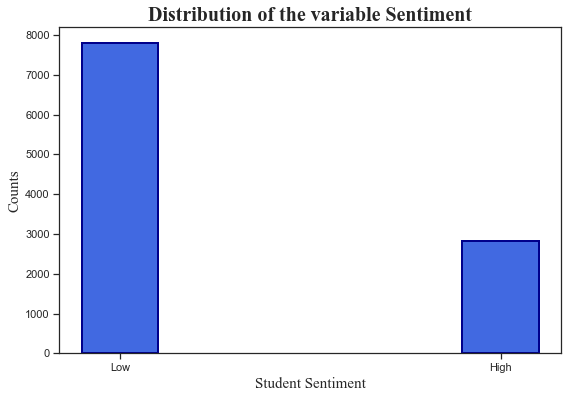

In [479]:
y = text_train["Space_Sentiment"].value_counts()
x = text_train["Space_Sentiment"].unique()
plt.bar(x,y,color = "royalblue",width = 0.2, linewidth=2, edgecolor = 'darkblue', align = "center")
plt.xlabel("Student Sentiment", fontsize='15', fontname='Times New Roman')
plt.ylabel("Counts", fontsize='15', fontname='Times New Roman')
plt.title("Distribution of the variable Sentiment",fontsize='20', fontname='Times New Roman',weight='bold')

In [ ]:
text_train_2["response"] = np.log(text_train_2["price"])
sns.boxplot(x = text_train["Space_Sentiment"], y = text_train_2["response"], boxprops=dict(alpha=.9), palette='Blues')
sns.despine()
plt.show()

#### 2.4.2 Description

In [492]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
#nltk.download()

def clean_text(text):
    
    tokenized = nltk.word_tokenize(text)
    punctuation = list(string.punctuation)
    tokenized_no_punctuation = [word.lower()for word in tokenized if word not in punctuation]
    tokenized_no_stopwords = [word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    Drop_word = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word !='']
    return Drop_word

In [493]:
%pip install wordcloud

In [494]:
%%time
#calculate the tfidf
tfidf_model = TfidfVectorizer(max_features = 100,
                              analyzer = 'word',                              
                              stop_words = 'english',
                              tokenizer = clean_text,
                              ngram_range = (2,2),
                              max_df = 0.98,
                              min_df = 2)

text_train['description'] = text_train['description'].astype('str').apply(clean_text)
corpus1 = text_train['description'].astype('str')
train_tfidf = tfidf_model.fit_transform(corpus1)

text_test['description'] = text_test['description'].astype('str').apply(clean_text)
corpus2 = text_test['description'].astype('str')
test_tfidf = tfidf_model.transform(corpus2)

train_tfidf = pd.DataFrame(train_tfidf.todense(),columns = tfidf_model.get_feature_names())

test_tfidf = pd.DataFrame(test_tfidf.todense(),columns = tfidf_model.get_feature_names())

Wall time: 30min 48s


(-0.5, 1439.5, 1079.5, -0.5)

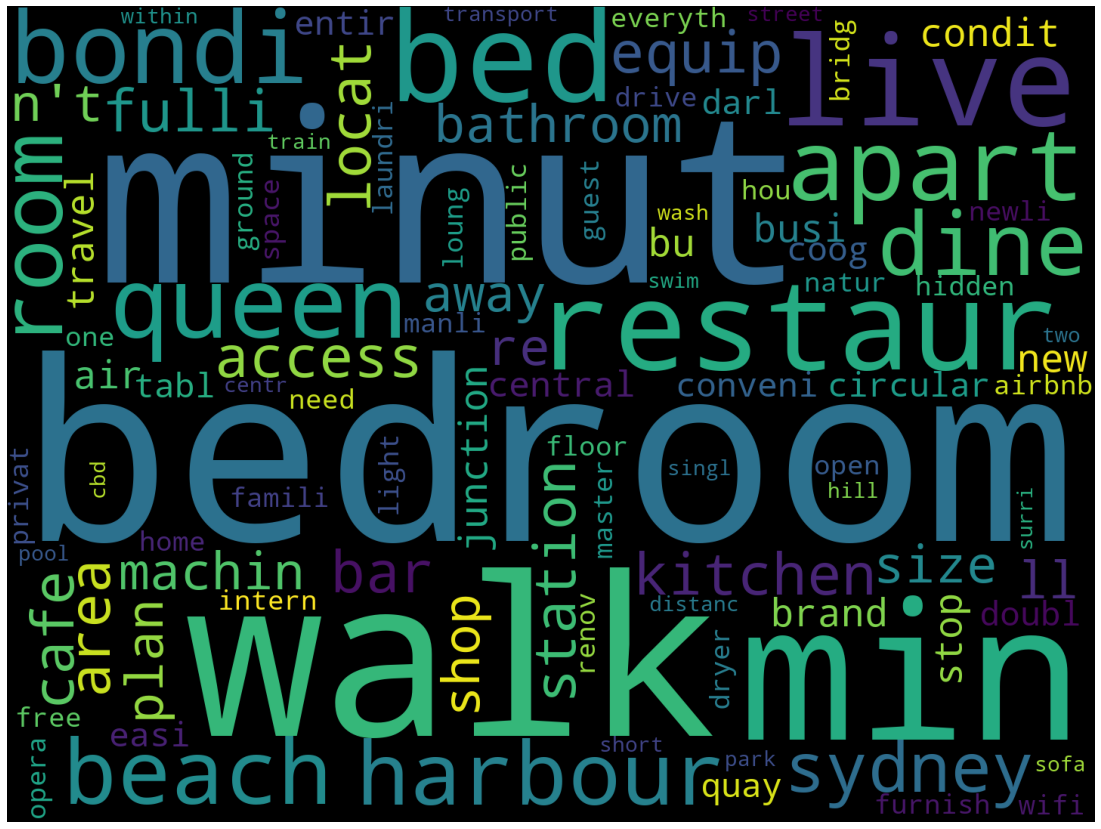

In [495]:
#generate wordcloud
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_tfidf))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [496]:
text_test.isnull().sum()

description              0
neighborhood_overview    0
notes                    0
transit                  0
access                   0
interaction              0
house_rules              0
host_about               0
Space_Sentiment          0
dtype: int64

#### 2.4.3 All other boolean variables

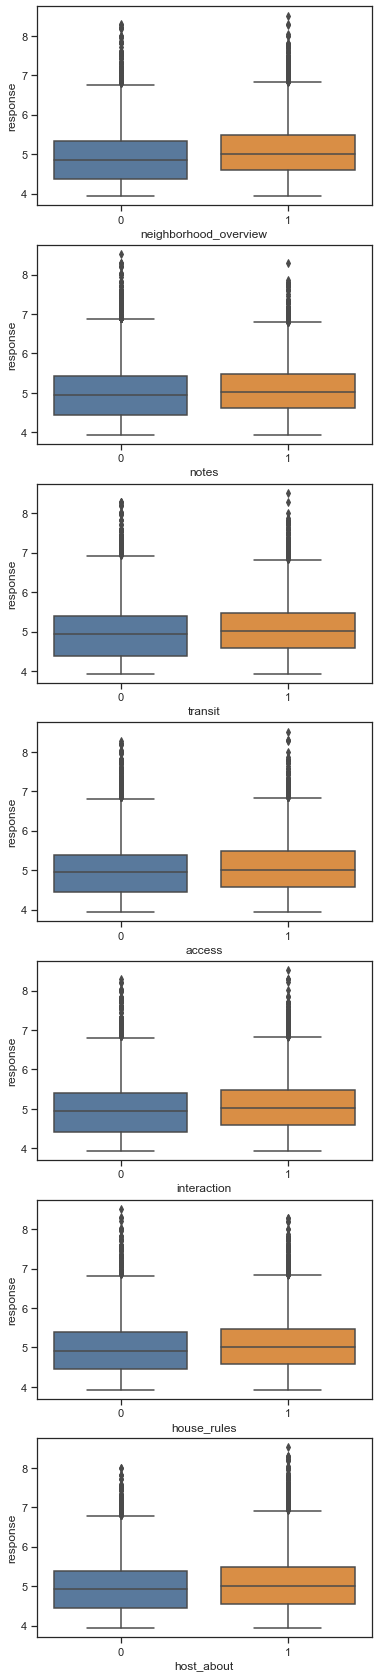

In [497]:
text_train_2["response"] = np.log(text_train_2["price"])
f, axes = plt.subplots(7,1, figsize = (6,30))
sns.boxplot(x=text_train_2['neighborhood_overview'], y=text_train_2['response'], ax=axes[0])
sns.boxplot(x=text_train_2['notes'], y=text_train_2['response'], ax=axes[1])
sns.boxplot(x=text_train_2['transit'], y=text_train_2['response'], ax=axes[2])
sns.boxplot(x=text_train_2['access'], y=text_train_2['response'], ax=axes[3])
sns.boxplot(x=text_train_2['interaction'], y=text_train_2['response'], ax=axes[4])
sns.boxplot(x=text_train_2['house_rules'], y=text_train_2['response'], ax=axes[5])
sns.boxplot(x=text_train_2['host_about'], y=text_train_2['response'], ax=axes[6])

## 3.0 Model

In [ ]:
# train_tfidf = pd.read_csv('train_tfidf100.csv')
# test_tfidf = pd.read_csv('test_tfidf100.csv')

In [498]:
train_final = pd.concat([categorical_train, numerical_train, location_train, text_train],axis = 1)
test_final = pd.concat([categorical_test, numerical_test, location_test, text_test],axis = 1)

In [499]:
skew = train_final.skew()
skew = skew[(skew>1)|(skew<-1)]
skew = pd.DataFrame (skew)
skew_list = list(skew.index)

In [500]:
#transform skewed variables by adding one so that 0 values won't be calculated as infinite
transform = np.log(train_final[skew_list]+1)

In [501]:
#find out variables that are originally in numerical_train but did not require transform
set(train_final.columns)-set(transform.columns)

{'Space_Sentiment',
 'access',
 'amenities',
 'cancellation_policy',
 'description',
 'host_about',
 'host_acceptance_rate',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'host_since',
 'host_verifications',
 'house_rules',
 'instant_bookable',
 'interaction',
 'is_location_exact',
 'last_review_',
 'maximum_nights',
 'neighborhood_overview',
 'notes',
 'property_type',
 'response',
 'room_type',
 'transit',
 'zipcode'}

In [502]:
miss_column = train_final.loc[:,list(set(train_final.columns)-set(transform.columns))]

In [503]:
#merge together
train_final_transform = pd.concat([transform,miss_column], axis=1)

In [504]:
set(train_final.columns)-set(train_final_transform.columns)

set()

In [505]:
skew = test_final.skew()
skew = skew[(skew>1)|(skew<-1)]
skew = pd.DataFrame (skew)
skew_list = list(skew.index)

transform = np.log(test_final[skew_list]+1)

miss_column = test_final.loc[:,list(set(test_final.columns)-set(transform.columns))]
test_final_transform = pd.concat([transform,miss_column], axis=1)

set(test_final.columns)-set(test_final_transform.columns)

set()

In [506]:
train_final = train_final.drop(columns = "description")
test_final = test_final.drop(columns = "description")

In [507]:
train_final = pd.get_dummies(train_final, drop_first=True)
test_final = pd.get_dummies(test_final, drop_first=True)

In [508]:
train_final = pd.concat([train_final, train_tfidf],axis = 1)
test_final = pd.concat([test_final, test_tfidf],axis = 1)

In [509]:
train_final = train_final.drop([7818, 671, 2193, 4687])
train_final = train_final.reset_index(drop=True)

In [510]:
set(train_final.columns)-set(test_final.columns)

{'response'}

In [511]:
set(test_final.columns)-set(train_final.columns)

set()

In [512]:
x_train = train_final.drop(columns = [ 'response'])
y_train = train_final["response"]
x_test = test_final

In [513]:
x_train.shape, y_train.shape, x_test.shape

((10631, 172), (10631,), (24818, 172))

### 3.1 Linear regression

In [514]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x_train, y_train)

LinearRegression()

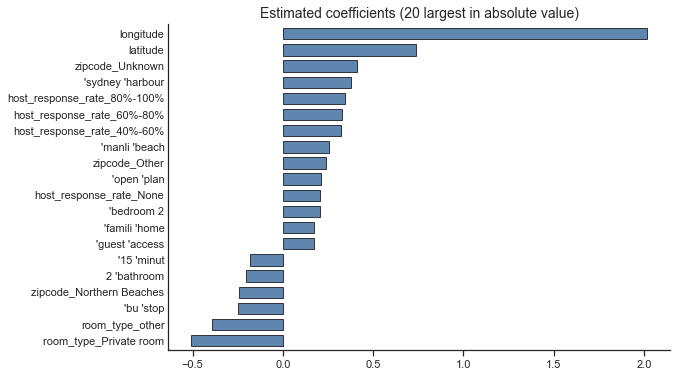

In [515]:
from statlearning import plot_coefficients
plot_coefficients(ols, x_train.columns)
plt.show()

In [521]:
pred_lr = np.exp(ols.predict(x_test))
pred_lr.shape

(24818,)

In [522]:
y_com_fitted = ols.predict(x_train)
resid = y_train - y_com_fitted
fig, ax = plt.subplots()
sns.regplot(y_com_fitted, resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values against residuals', fontsize=16)
sns.despine()
plt.show()

#### Standardisation

In [ ]:
x_train_std = np.std(x_train)
x_test_std = np.std(x_test)
x_train_mean = np.mean(x_train)
x_test_mean =  np.mean(x_test)

x_train_standardized = (x_train - x_train_mean)/x_train_std
x_test_standardized = (x_test - x_test_mean)/x_test_std

### 3.2 Ridge regression

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
%%time
alphas = list(np.logspace(-15, 15, 151, base=2))
ridge = RidgeCV(alphas=alphas)
ridge.fit(x_train, y_train)

In [ ]:
pred_ridge= np.exp(ridge.predict(x_test))
pred_ridge.shape

In [ ]:
plot_coefficients(ridge, x_train_standardized.columns)
plt.show()

### 3.3 Lasso

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
%%time
lasso = LassoCV(cv=5)
lasso.fit(x_train, y_train)

In [ ]:
np.sum(lasso.coef_==0.0)

The lasso shrinks 542  coefficients to zero.

In [ ]:
np.sum(lasso.coef_!=0.0)

In [ ]:
x_train.columns[lasso.coef_!=0.0]

In [ ]:
#LASSO Lambda
lasso.alpha_

In [ ]:
pred_lasso = np.exp(lasso.predict(x_test))
pred_lasso.shape

In [ ]:
plot_coefficients(lasso, x_train.columns)
plt.show()

In [ ]:
lasso_coef = pd.DataFrame(np.c_[x_train_standardized.columns, lasso.coef_], columns = ["features", "coef"])
lasso_coef

### 3.4 Elastic net

In [ ]:
%%time
from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(x_train, y_train)

In [ ]:
enet.l1_ratio_

In [ ]:
np.sum(enet.coef_==0.0)

In [ ]:
pred_enet = np.exp(enet.predict(x_test))
pred_enet.shape

In [ ]:
plot_coefficients(enet, x_train_standardized.columns)
plt.show()

In [ ]:
enet_coef = pd.DataFrame(np.c_[x_train.columns, enet.coef_], columns = ["features", "coef"])
enet_coef

### 3.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time

model = RandomForestRegressor(random_state = 0)

search_space = {
    'n_estimators' : np.arange(200,1000, 200),  #变参数 e.g.(200, 400, 600)
    'min_samples_leaf': [1, 5, 10, 20, 50],           #变参数 e.g.(1, 5, 10, 20)
    'max_features': np.arange(1, x_train.shape[1]),
}

rf_search = RandomizedSearchCV(model, search_space, cv = 5, n_jobs = 4)
rf_search.fit(x_train, y_train)

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

In [ ]:
rf_search = RandomForestRegressor(n_estimators =400 , min_samples_leaf= 1, max_features = 82, random_state = 0)
rf_search.fit(x_train, y_train)

In [ ]:
pred_rf = np.exp(rf_search.predict(x_test))

In [ ]:
importance = rf_search.feature_importances_
indices = np.argsort(importance)[::-1]
topindices = indices[:10]
topindices

In [ ]:
features = x_train.columns[topindices].to_list()
features

In [ ]:
plt.figure(figsize = (16,9), facecolor='papayawhip')
fig = plt.figure(figsize = (16,9), facecolor='papayawhip')

plt.barh(range(10),importance[topindices][::-1])
plt.yticks(range(10), features[::-1])
plt.xlabel("Relative Importance", fontsize='15', fontname='Times New Roman')
plt.ylabel("Features", fontsize='15', fontname='Times New Roman')
plt.title("Feature Importance",fontsize='20', fontname='Times New Roman',weight='bold')

for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('15')
    tick.set_fontname('Arial')
    tick.set_color('midnightblue')
    tick.set_weight('bold')

plt.show()

### 3.6 XgBoost

In [ ]:
pip install xgboost

In [ ]:
x_train_xge = x_train.values
x_test_xgb = x_test.values

In [ ]:
import xgboost as xgb
from scipy.stats import uniform as unif
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
%%time

model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0.5)

search_space = {
    'learning_rate': unif(0.005,0.1), # uniform distribution between 0.005 and 0.1
    'n_estimators' : randint(100, 2501), # discrete uniform distribution between 100 and 2500
    'max_depth' : [2 ,3, 4, 5, 6, 7, 8], # discrete uniform distribution between 2 and 4
    'subsample' : unif(0.5, 1), # uniform distribution between 0.5 and 1
}

xbst = RandomizedSearchCV(model, search_space, n_iter = 32, cv = 5, random_state=87, n_jobs=4)
xbst.fit(x_train_xge, y_train)

print('Best parameters found by randomised search:', xbst.best_params_, '\n')

In [ ]:
xbst = xgb.XGBRegressor(max_depth = 7, learning_rate = 0.006455872474920672, n_estimators = 2029,
                    subsample= 0.7722903186570831) #这里的41 是根据上面跑完最优解改
xbst.fit(x_train, y_train)

In [ ]:
pred_xbst = np.exp(xbst.predict(x_test))

In [ ]:
importance2 = xbst.feature_importances_
indices2 = np.argsort(importance2)[::-2]
topindices2 = indices2[:10]
features2 = x_train.columns[topindices2].to_list()
features2

In [ ]:
plt.figure(figsize = (16,9), facecolor='papayawhip')
fig = plt.figure(figsize = (16,9), facecolor='papayawhip')

plt.barh(range(10),importance2[topindices2][::-1])
plt.yticks(range(10), features2[::-1])
plt.xlabel("Relative Importance", fontsize='15', fontname='Times New Roman')
plt.ylabel("Features", fontsize='15', fontname='Times New Roman')
plt.title("Feature Importance",fontsize='20', fontname='Times New Roman',weight='bold')

for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('15')
    tick.set_fontname('Arial')
    tick.set_color('midnightblue')
    tick.set_weight('bold')

plt.show()

### 3.7 LighGBM

In [ ]:
conda install -c conda-forge lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
%%time

model = lgb.LGBMRegressor(objective='regression')

search_space = {
    'learning_rate': unif(0.005,0.1), # uniform distribution between 0.005 and 0.1
    'n_estimators' : randint(100, 2501), # discrete uniform distribution between 100 and 2500
    'num_leaves' : randint(2, 65), # discrete uniform distribution between 2 and 4
    'subsample' : unif(0.5, 1), # uniform distribution between 0.5 and 1
}


lbst = RandomizedSearchCV(model, search_space, n_iter = 64, cv = 5, n_jobs=4, random_state=1)
lbst.fit(x_train, y_train)


print('Best parameters found by randomised search:', lbst.best_params_, '\n')

In [ ]:
lgb = lgb.LGBMRegressor(num_leaves = 22, learning_rate = 0.018747470414623754, n_estimators = 1167,
                      subsample = 0.8775843411510946) #这里是根据上面跑完最优解改
lgb.fit(x_train, y_train)

In [ ]:
pred_lgb = np.exp(lgb.predict(x_test))

In [ ]:
importance3 = lgb.feature_importances_
indices3 = np.argsort(importance3)[::-3]
topindices3 = indices3[:10]
features3 = x_train.columns[topindices3].to_list()
features3

In [ ]:
plt.figure(figsize = (16,9), facecolor='papayawhip')
fig = plt.figure(figsize = (16,9), facecolor='papayawhip')

plt.barh(range(10),importance3[topindices3][::-1])
plt.yticks(range(10), features3[::-1])
plt.xlabel("Relative Importance", fontsize='15', fontname='Times New Roman')
plt.ylabel("Features", fontsize='15', fontname='Times New Roman')
plt.title("Feature Importance",fontsize='20', fontname='Times New Roman',weight='bold')

for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('15')
    tick.set_fontname('Arial')
    tick.set_color('midnightblue')
    tick.set_weight('bold')

plt.show()

### 3.8 Model stacking

In [ ]:
%%time 

from mlxtend.regressor import StackingCVRegressor

stack = StackingCVRegressor(regressors=[ols, ridge, enet, lasso, rf_search, xbst, lgb], \
                            meta_regressor=LinearRegression(), n_jobs=-1, cv=5, random_state=10)
stack.fit(x_train, y_train)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
stack.meta_regr_.coef_

In [ ]:
pred_stack = np.exp(stack.predict(x_test.values))

In [ ]:
%%time 

stack = StackingCVRegressor(regressors=[ridge, enet, lasso, rf_search, xbst, lgb], meta_regressor=LinearRegression(), n_jobs=-1,
                           cv=5, random_state=10)
stack.fit(x_train_standardized, y_train)

In [ ]:
stack.meta_regr_.coef_

In [ ]:
pred_stack = np.exp(stack.predict(x_test.values))

### 3.9 Evaluation

In [523]:
#cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# models = ["ols", "ridge", "enet", "lasso",  "rf_search"]

# pred = cross_val_predict(ridge, x_train_standardized, y_train, cv = 5)
# score = np.sqrt(mean_squared_error(y_train, pred))
# scores

scores = cross_val_score(pred_lr, x_train.values, y_train, cv = 5, scoring = 'neg_mean_squared_error')
scores

TypeError: estimator should be an estimator implementing 'fit' method, array([131.55743516, 494.51326711, 208.56078057, ...,  97.86807602,
        97.31485721,  86.09432036]) was passed

In [ ]:
rmse = np.sqrt(-1*np.mean(scores))
print(rmse)

## 4.0 Submission

In [ ]:
y_pred = pred_stack
sub = pd.DataFrame (np.c_[x_test.index, y_pred], columns = ["Id","price"])
sub["Id"] = sub["Id"].astype("int")
sub.to_csv("{pred_stack 2} sub.csv", index = False)